<a href="https://colab.research.google.com/github/warut/DrivenData/blob/PracticeFluShots/Driven_Data_Practice_Problem.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install catboost

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 98.7/98.7 MB 6.1 MB/s eta 0:00:00


In [ ]:
!pip install ipywidgets

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 29.1 MB/s eta 0:00:00


In [ ]:
!pip install shap

In [ ]:
import os
import shutil

from google.colab import files

kaggle_dir = '/root/.kaggle'
#kaggle_json_drive = '/content/drive/My Drive/kaggle/kaggle.json'
kaggle_json_colab = f'{kaggle_dir}/kaggle.json'

os.makedirs(kaggle_dir, exist_ok=True)

# Upload kaggle.json if it doesn't already exist
if not os.path.exists(kaggle_json_colab):
    uploaded = files.upload()
    shutil.move('kaggle.json', kaggle_json_colab)
    os.chmod(kaggle_json_colab, 0o600)


Saving kaggle.json to kaggle.json


In [ ]:
import google.generativeai as genai
from IPython.display import HTML, Markdown, display

In [ ]:
from google.colab import files
files.upload();

Saving test_set_features.csv to test_set_features.csv
Saving training_set_labels.csv to training_set_labels.csv
Saving training_set_features.csv to training_set_features.csv


In [ ]:
# -------------------- For Data Visualization --------------------
import matplotlib.pyplot as plt
import seaborn as sns
from catboost import *
from catboost import datasets

In [ ]:
import numpy as np
import pandas as pd

ptrain = "/content/training_set_features.csv"
ptest = "/content/test_set_features.csv"
df_train=pd.read_csv(ptrain)
df_test=pd.read_csv(ptest)

In [ ]:
temp=df_train.select_dtypes(include=['float'])
temp2=df_train[temp].astype('Int64')
#temp2=temp2.astype('category')
#df_train['h1n1_concern']=df_train['h1n1_concern'].fillna('unknown')
#temp=pd.to_numeric(df_train['behavioral_antiviral_meds'].round(),errors='coerce').astype('Int64')
#temp=pd.to_numeric(df_train['h1n1_concern'].round(),errors='coerce').astype('Int64')

In [ ]:
temp2['behavioral_antiviral_meds'].unique()

<IntegerArray>
[<NA>]
Length: 1, dtype: Int64

In [ ]:
df_train_out = pd.read_csv("/content/training_set_labels.csv")
df_train_out.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26707 entries, 0 to 26706
Data columns (total 3 columns):
 #   Column            Non-Null Count  Dtype
---  ------            --------------  -----
 0   respondent_id     26707 non-null  int64
 1   h1n1_vaccine      26707 non-null  int64
 2   seasonal_vaccine  26707 non-null  int64
dtypes: int64(3)
memory usage: 626.1 KB


In [ ]:
#Both H1N1 and Seasonal flu shot
df_train_out[(df_train_out['h1n1_vaccine']==1) & (df_train_out['seasonal_vaccine']==1)].shape

(4697, 3)

In [ ]:
#Only H1N1
df_train_out[(df_train_out['h1n1_vaccine']==1) & (df_train_out['seasonal_vaccine']==0)].shape

(977, 3)

In [ ]:
#Only Seasonal
df_train_out[(df_train_out['h1n1_vaccine']==0) & (df_train_out['seasonal_vaccine']==1)].shape

(7738, 3)

In [ ]:
#Not taking any shot is around 50% of training samples
df_train_out[(df_train_out['h1n1_vaccine']==0) & (df_train_out['seasonal_vaccine']==0)].shape

(13295, 3)

In [ ]:
df_submision=pd.read_csv('/content/submission3.csv')
df_submision.shape

respondent_id  h1n1_vaccine  seasonal_vaccine
0          26707      0.360296          0.199423
1          26708      0.119262          0.026041
2          26709      0.419642          0.642311
3          26710      0.774636          0.918094
4          26711      0.552377          0.487341

In [ ]:
df_submision[(df_submision['h1n1_vaccine']>=0.5) & (df_submision['seasonal_vaccine']>=0.5)].shape

(6220, 3)

In [ ]:
df_submision[(df_submision['h1n1_vaccine']>=0.5) & (df_submision['seasonal_vaccine']<0.5)].shape

(1932, 3)

In [ ]:
df_submision[(df_submision['h1n1_vaccine']<0.5) & (df_submision['seasonal_vaccine']>=0.5)].shape

(5844, 3)

In [ ]:
df_submision[(df_submision['h1n1_vaccine']<0.5) & (df_submision['seasonal_vaccine']<0.5)].shape

(12712, 3)

In [ ]:
df_submision.shape

(26708, 3)

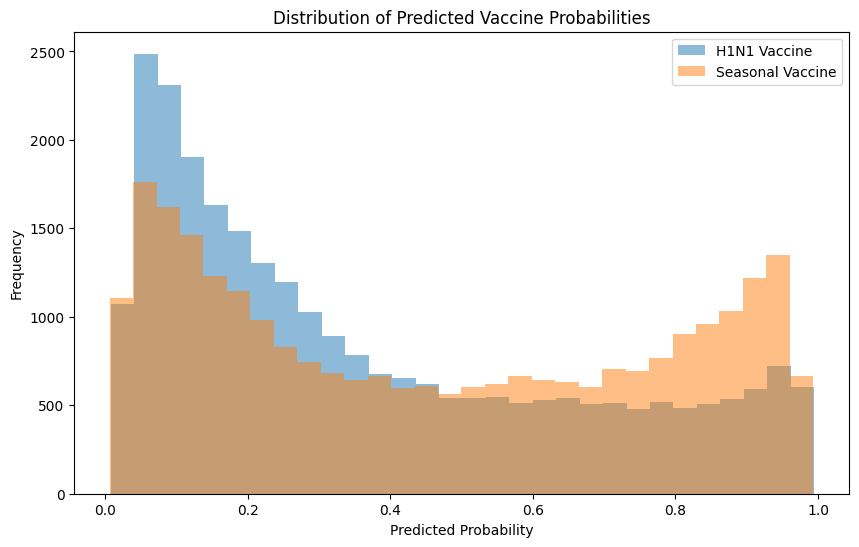

In [ ]:
# @title Distribution of Predicted Vaccine Probabilities

import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))

plt.hist(df_submision['h1n1_vaccine'], bins=30, alpha=0.5, label='H1N1 Vaccine')
plt.hist(df_submision['seasonal_vaccine'], bins=30, alpha=0.5, label='Seasonal Vaccine')

plt.title('Distribution of Predicted Vaccine Probabilities')
plt.xlabel('Predicted Probability')
plt.ylabel('Frequency')
_ = plt.legend()


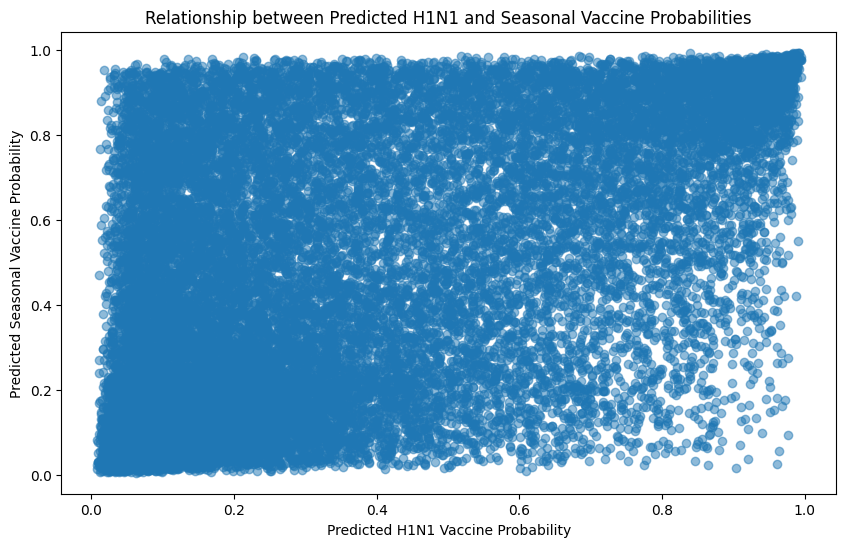

In [ ]:
# @title Relationship between Predicted H1N1 and Seasonal Vaccine Probabilities

import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.scatter(df_submision['h1n1_vaccine'], df_submision['seasonal_vaccine'], alpha=0.5)
plt.title('Relationship between Predicted H1N1 and Seasonal Vaccine Probabilities')
plt.xlabel('Predicted H1N1 Vaccine Probability')
_ = plt.ylabel('Predicted Seasonal Vaccine Probability')

In [ ]:
# Selecting numeric columns (of type 'float' or 'int') from the 'factors' DataFrame
numeric_columns = df_train.select_dtypes(include=['float', 'int']).columns

# Selecting object columns (of type 'object') from the 'factors' DataFrame
object_columns = df_train.select_dtypes(include=['object']).columns

In [ ]:
numeric_columns

Index(['respondent_id', 'h1n1_concern', 'h1n1_knowledge',
       'behavioral_antiviral_meds', 'behavioral_avoidance',
       'behavioral_face_mask', 'behavioral_wash_hands',
       'behavioral_large_gatherings', 'behavioral_outside_home',
       'behavioral_touch_face', 'doctor_recc_h1n1', 'doctor_recc_seasonal',
       'chronic_med_condition', 'child_under_6_months', 'health_worker',
       'health_insurance', 'opinion_h1n1_vacc_effective', 'opinion_h1n1_risk',
       'opinion_h1n1_sick_from_vacc', 'opinion_seas_vacc_effective',
       'opinion_seas_risk', 'opinion_seas_sick_from_vacc', 'household_adults',
       'household_children'],
      dtype='object')

In [ ]:
df_train_cat = df_train[numeric_columns].drop('respondent_id',axis=1)
df_train_cat = df_train_cat.round().astype('Int64')
df_train_cat = df_train_cat.astype('category')

In [ ]:
test=pd.DataFrame({'a':[1.0,2.0,np.nan]})
t=test['a'].round().astype('Int64')
test2=pd.DataFrame(t)
t

0       1
1       2
2    <NA>
Name: a, dtype: Int64

In [ ]:
#%%timeit
#temp=df_train.copy()

subset=numeric_columns.difference(['respondent_id'])
#temp.loc[:,subset]=temp.loc[:,subset].astype(str)
df_train.fillna('unknown',inplace=True)
df_train[numeric_columns.difference(['respondent_id'])]=df_train[numeric_columns.difference(['respondent_id'])].astype('category')
#df_train_cat=pd.concat([df_train['respondent_id'],temp],axis=1)
df_train.info()

<ipython-input-57-d2765c38c9ed>:6: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value 'unknown' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  df_train.fillna('unknown',inplace=True)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26707 entries, 0 to 26706
Data columns (total 36 columns):
 #   Column                       Non-Null Count  Dtype   
---  ------                       --------------  -----   
 0   respondent_id                26707 non-null  int64   
 1   h1n1_concern                 26707 non-null  category
 2   h1n1_knowledge               26707 non-null  category
 3   behavioral_antiviral_meds    26707 non-null  category
 4   behavioral_avoidance         26707 non-null  category
 5   behavioral_face_mask         26707 non-null  category
 6   behavioral_wash_hands        26707 non-null  category
 7   behavioral_large_gatherings  26707 non-null  category
 8   behavioral_outside_home      26707 non-null  category
 9   behavioral_touch_face        26707 non-null  category
 10  doctor_recc_h1n1             26707 non-null  category
 11  doctor_recc_seasonal         26707 non-null  category
 12  chronic_med_condition        26707 non-null  category
 13  c

In [ ]:
df_train[df_train['health_insurance'].isna()].index.to_list()[:5]
df_train.iloc[2]
type(temp.iloc[2]['health_insurance'])

numpy.float64

In [ ]:
type(temp.iloc[2]['health_insurance'])

numpy.float64

In [ ]:
object_columns

Index(['age_group', 'education', 'race', 'sex', 'income_poverty',
       'marital_status', 'rent_or_own', 'employment_status', 'hhs_geo_region',
       'census_msa', 'employment_industry', 'employment_occupation'],
      dtype='object')

In [ ]:
colH1N1=df_train.filter(like='h1n1',axis=1).columns
colH1N1

Index(['h1n1_concern', 'h1n1_knowledge', 'doctor_recc_h1n1',
       'opinion_h1n1_vacc_effective', 'opinion_h1n1_risk',
       'opinion_h1n1_sick_from_vacc'],
      dtype='object')

In [ ]:
colSEA=df_train.filter(like='sea',axis=1).columns
colSEA

Index(['doctor_recc_seasonal', 'opinion_seas_vacc_effective',
       'opinion_seas_risk', 'opinion_seas_sick_from_vacc'],
      dtype='object')

In [ ]:
colCOM=df_train.columns.difference(colH1N1.union(colSEA)).drop('respondent_id')
colCOM

Index(['age_group', 'behavioral_antiviral_meds', 'behavioral_avoidance',
       'behavioral_face_mask', 'behavioral_large_gatherings',
       'behavioral_outside_home', 'behavioral_touch_face',
       'behavioral_wash_hands', 'census_msa', 'child_under_6_months',
       'chronic_med_condition', 'education', 'employment_industry',
       'employment_occupation', 'employment_status', 'health_insurance',
       'health_worker', 'hhs_geo_region', 'household_adults',
       'household_children', 'income_poverty', 'marital_status', 'race',
       'rent_or_own', 'sex'],
      dtype='object')

In [ ]:
df_train[colCOM].head()

age_group behavioral_antiviral_meds behavioral_avoidance  \
0  55 - 64 Years                       0.0                  0.0   
1  35 - 44 Years                       0.0                  1.0   
2  18 - 34 Years                       0.0                  1.0   
3      65+ Years                       0.0                  1.0   
4  45 - 54 Years                       0.0                  1.0   

  behavioral_face_mask behavioral_large_gatherings behavioral_outside_home  \
0                  0.0                         0.0                     1.0   
1                  0.0                         0.0                     1.0   
2                  0.0                         0.0                     0.0   
3                  0.0                         1.0                     0.0   
4                  0.0                         1.0                     0.0   

  behavioral_touch_face behavioral_wash_hands                census_msa  \
0                   1.0                   0.0                   Non-MSA   
1                   1.0                   1.0  MSA, Not Principle  City   
2                   0.0                   0.0  MSA, Not Principle  City   
3                   0.0                   1.0       MSA, Principle City   
4                   1.0                   1.0  MSA, Not Principle  City   

  child_under_6_months  ... health_insurance health_worker hhs_geo_region  \
0                  0.0  ...              1.0           0.0       oxchjgsf   
1                  0.0  ...              1.0           0.0       bhuqouqj   
2                  0.0  ...              NaN           0.0       qufhixun   
3                  0.0  ...              NaN           0.0       lrircsnp   
4                  0.0  ...              NaN           0.0       qufhixun   

  household_adults household_children             income_poverty  \
0              0.0                0.0              Below Poverty   
1              0.0                0.0              Below Poverty   
2              2.0                0.0  <= $75,000, Above Poverty   
3              0.0                0.0              Below Poverty   
4              1.0                0.0  <= $75,000, Above Poverty   

  marital_status   race rent_or_own     sex  
0    Not Married  White         Own  Female  
1    Not Married  White        Rent    Male  
2    Not Married  White         Own    Male  
3    Not Married  White        Rent  Female  
4        Married  White         Own  Female  

[5 rows x 25 columns]

In [ ]:
df_train['health_insurance'].value_counts()

health_insurance
1.0    12697
0.0     1736
Name: count, dtype: int64

In [ ]:
df_train['health_insurance'].isna().sum()

12274

<ipython-input-34-a733749192fb>:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(x=col, data=df_train, order=order, palette="Blues_d")


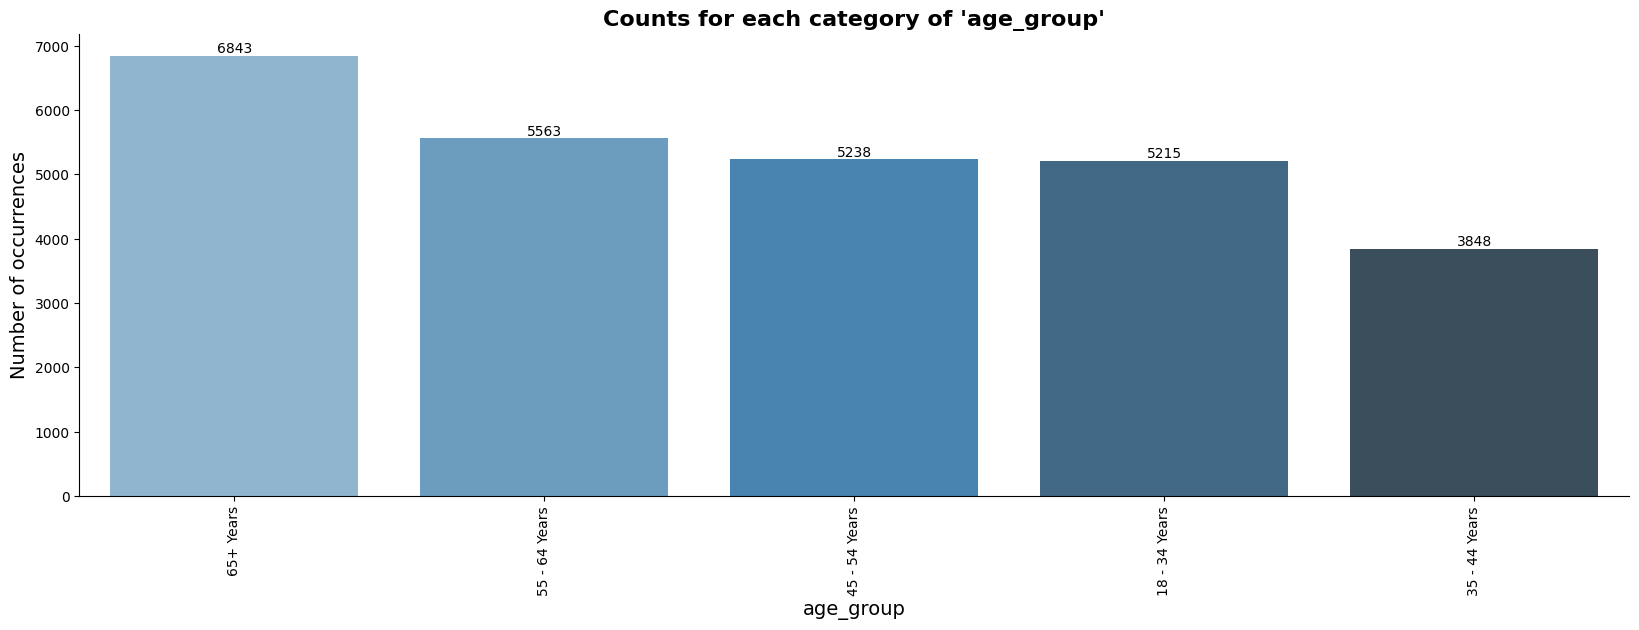

<ipython-input-34-a733749192fb>:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(x=col, data=df_train, order=order, palette="Blues_d")


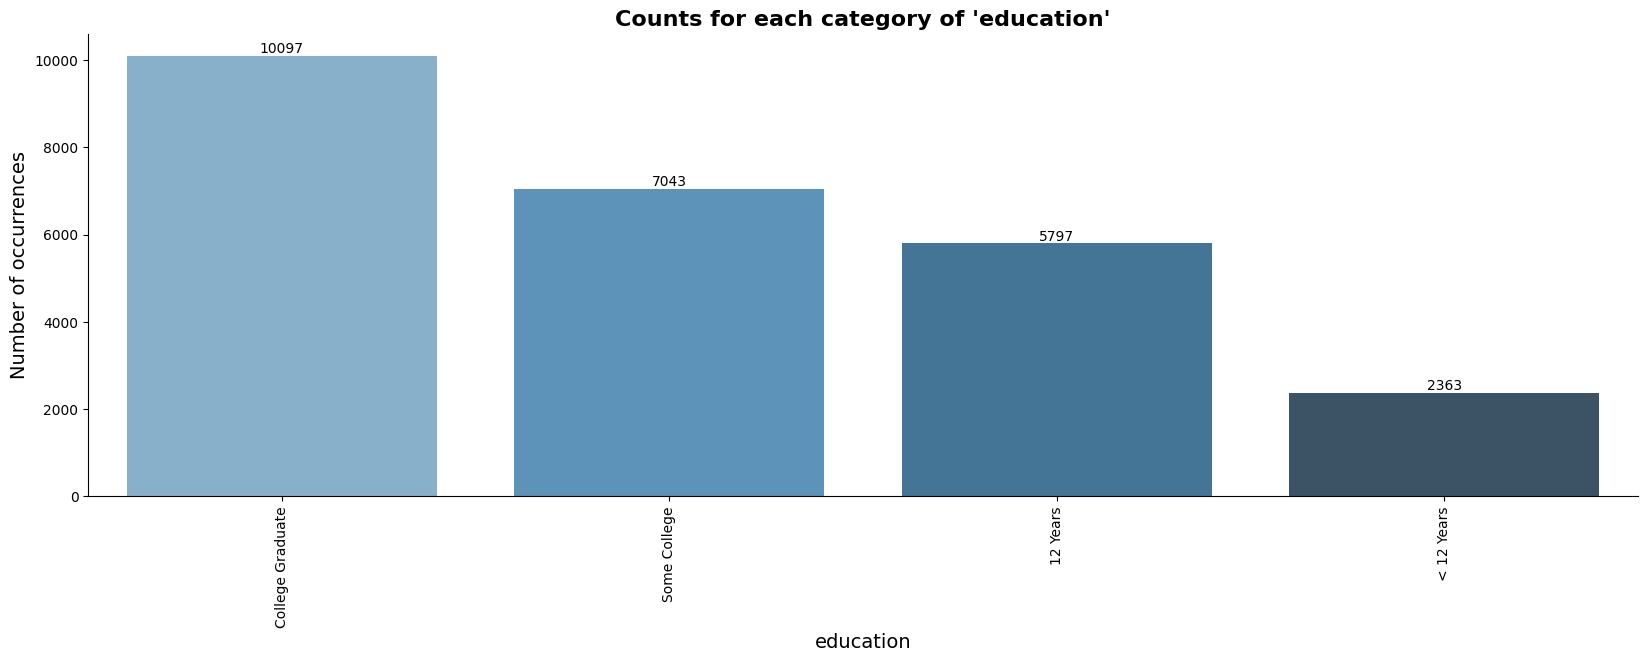

<ipython-input-34-a733749192fb>:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(x=col, data=df_train, order=order, palette="Blues_d")


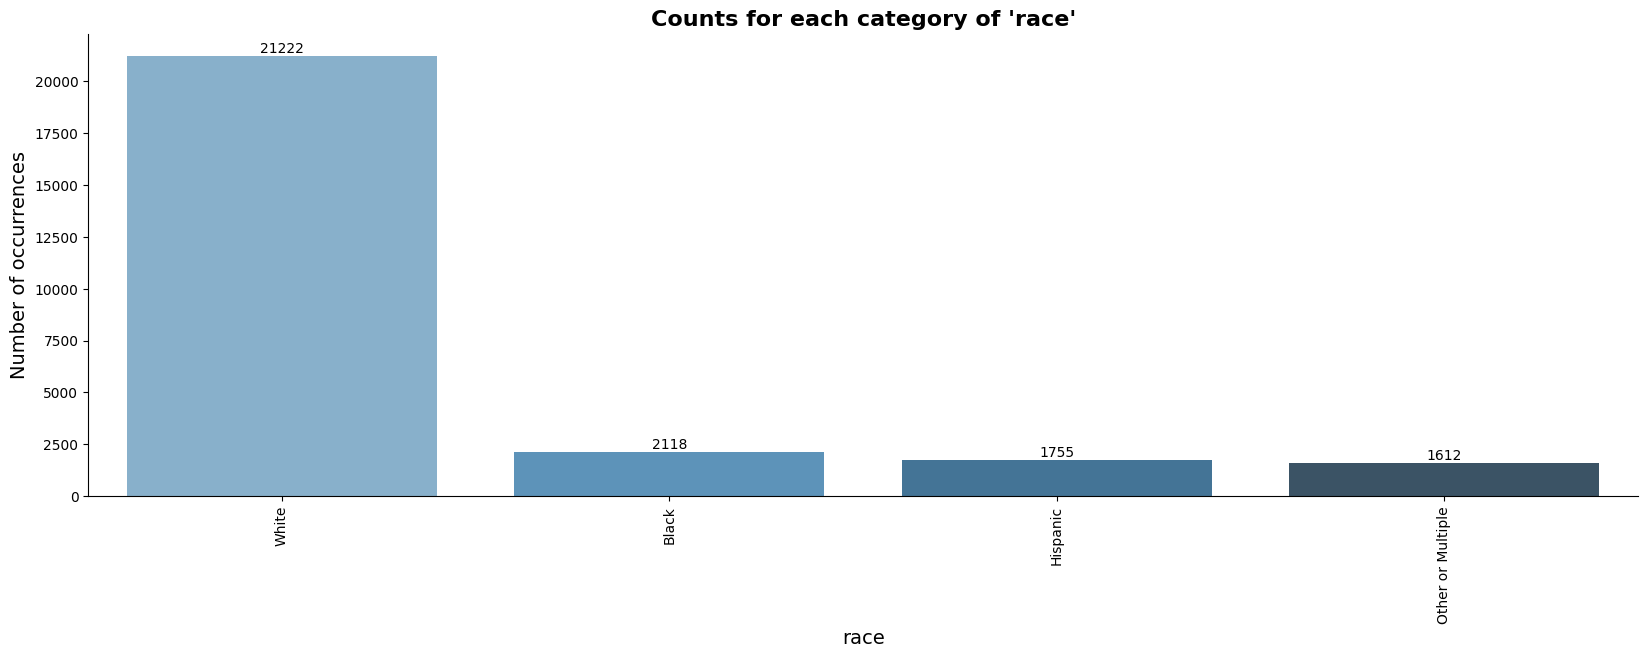

<ipython-input-34-a733749192fb>:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(x=col, data=df_train, order=order, palette="Blues_d")


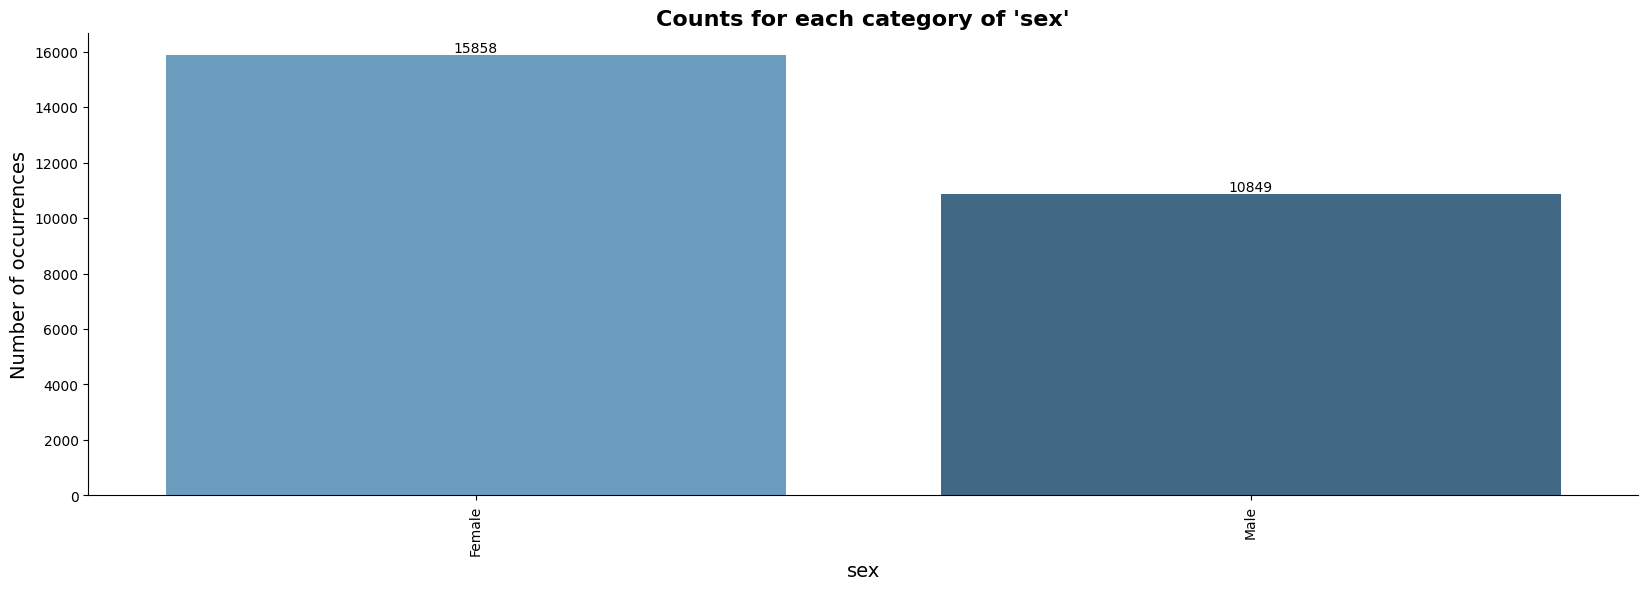

<ipython-input-34-a733749192fb>:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(x=col, data=df_train, order=order, palette="Blues_d")


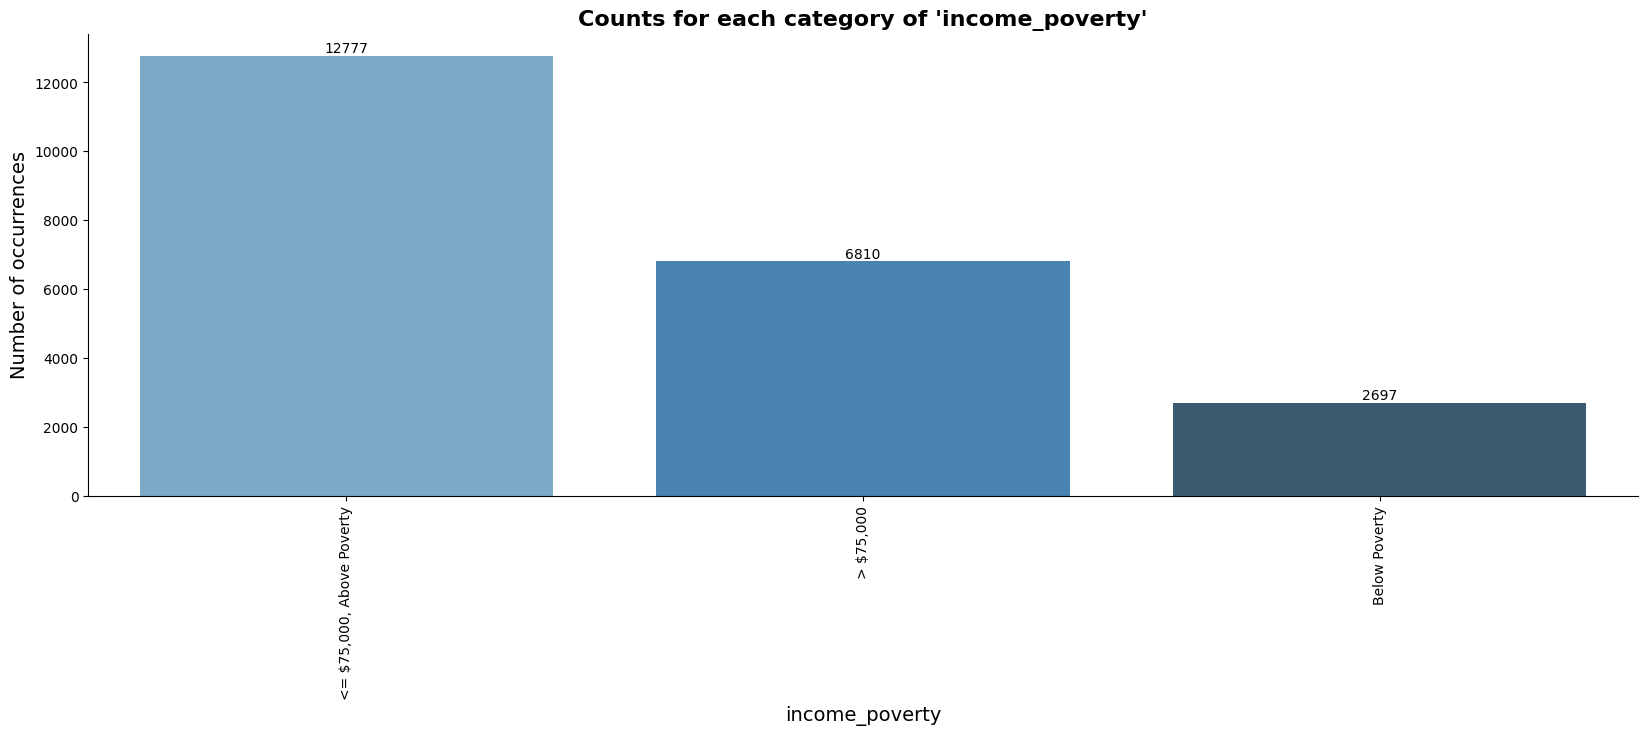

<ipython-input-34-a733749192fb>:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(x=col, data=df_train, order=order, palette="Blues_d")


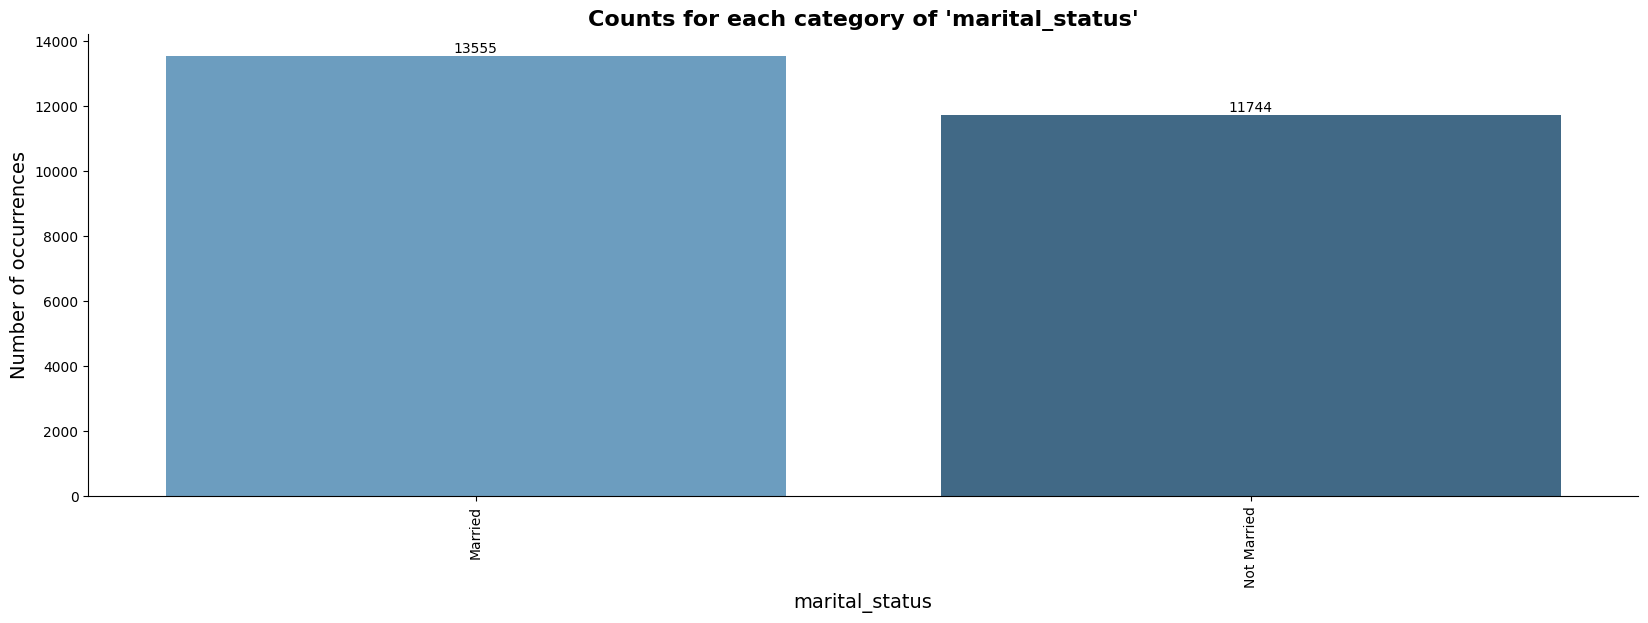

<ipython-input-34-a733749192fb>:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(x=col, data=df_train, order=order, palette="Blues_d")


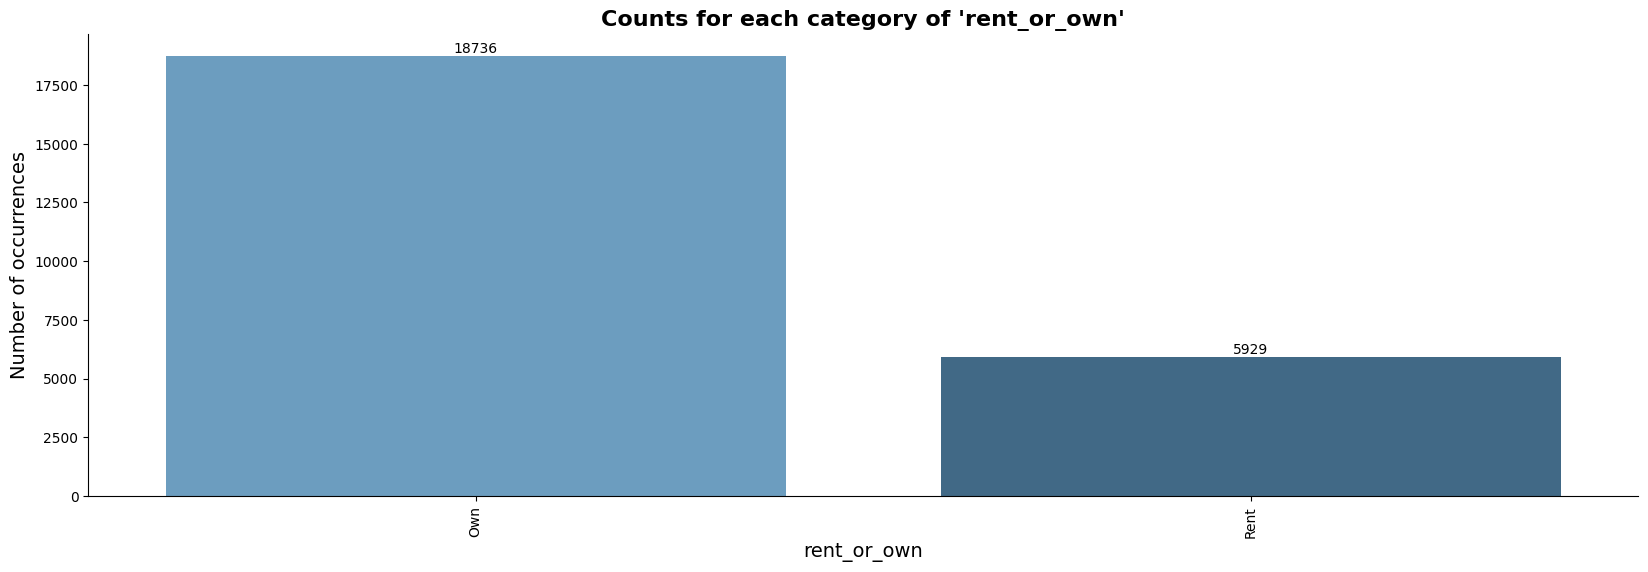

<ipython-input-34-a733749192fb>:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(x=col, data=df_train, order=order, palette="Blues_d")


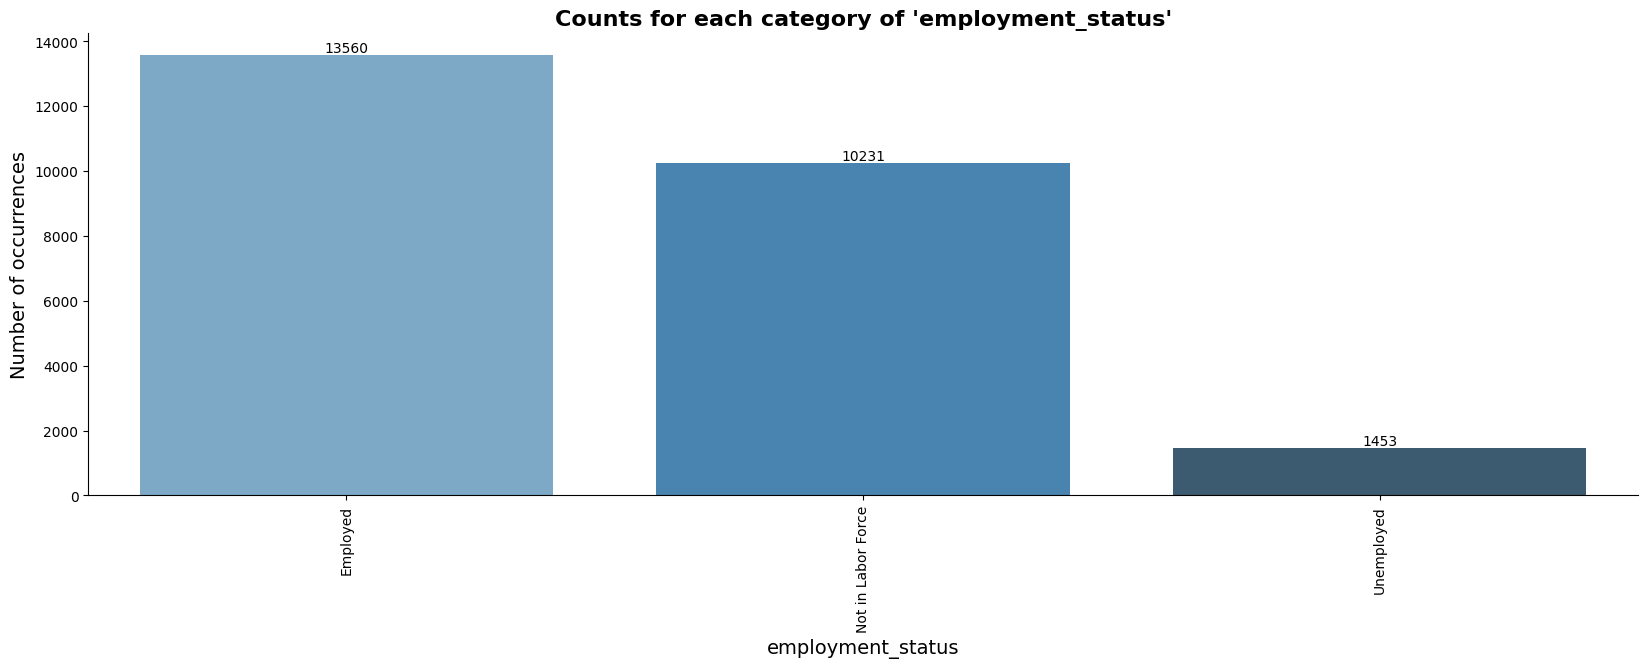

<ipython-input-34-a733749192fb>:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(x=col, data=df_train, order=order, palette="Blues_d")


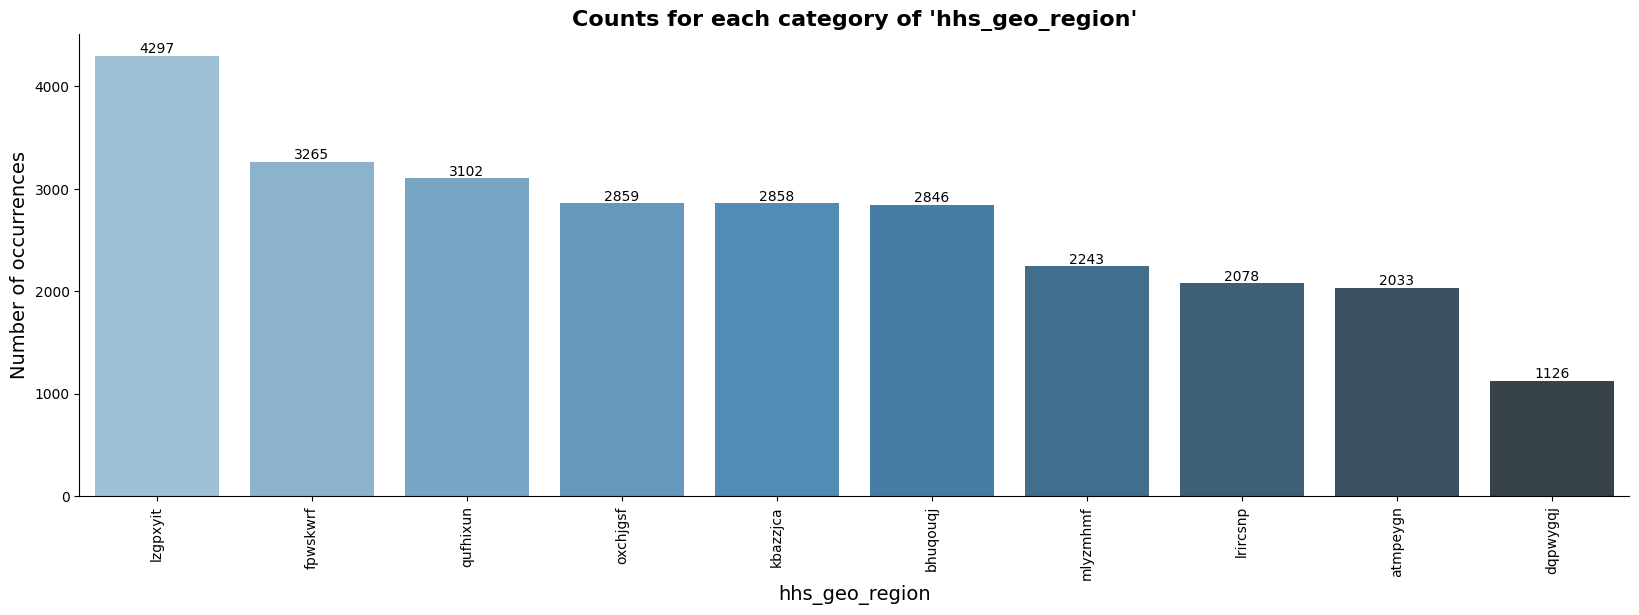

<ipython-input-34-a733749192fb>:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(x=col, data=df_train, order=order, palette="Blues_d")


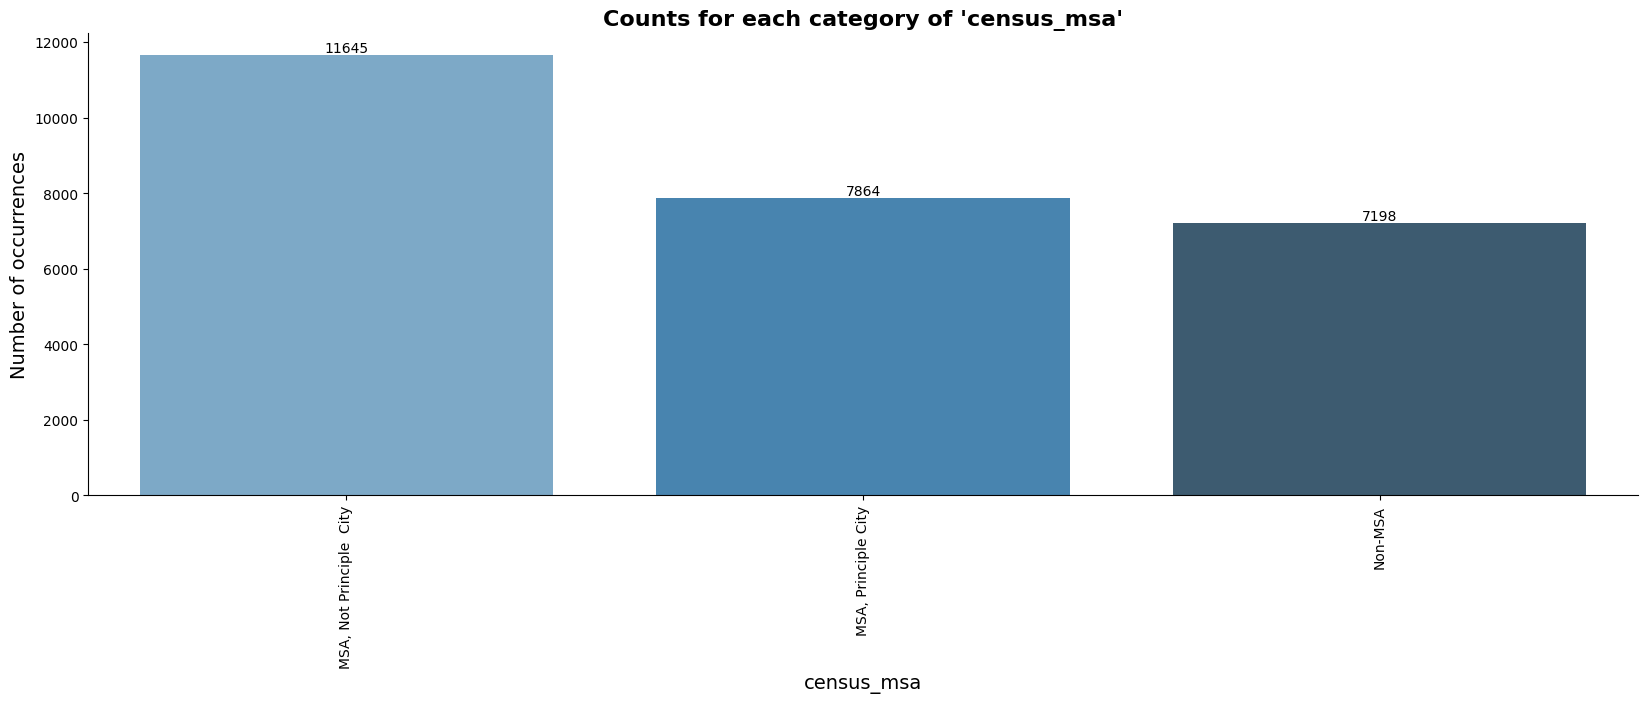

<ipython-input-34-a733749192fb>:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(x=col, data=df_train, order=order, palette="Blues_d")


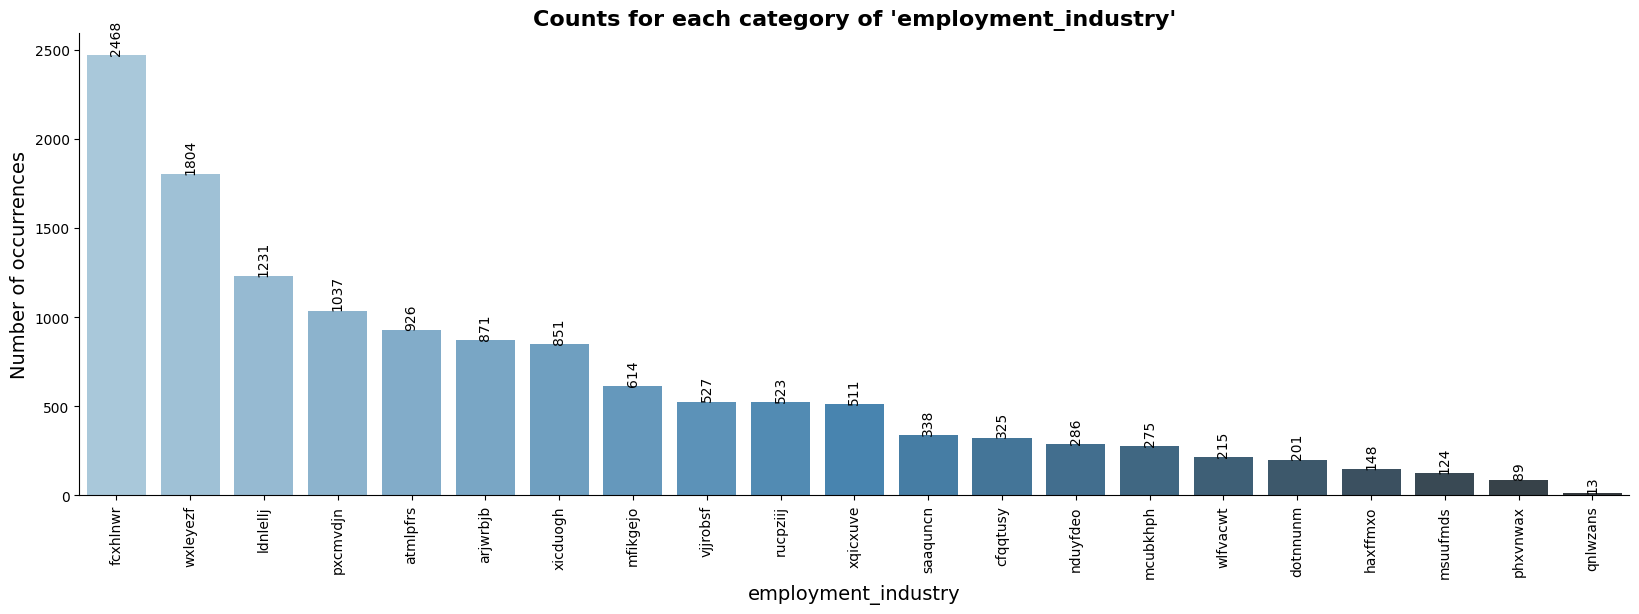

<ipython-input-34-a733749192fb>:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(x=col, data=df_train, order=order, palette="Blues_d")


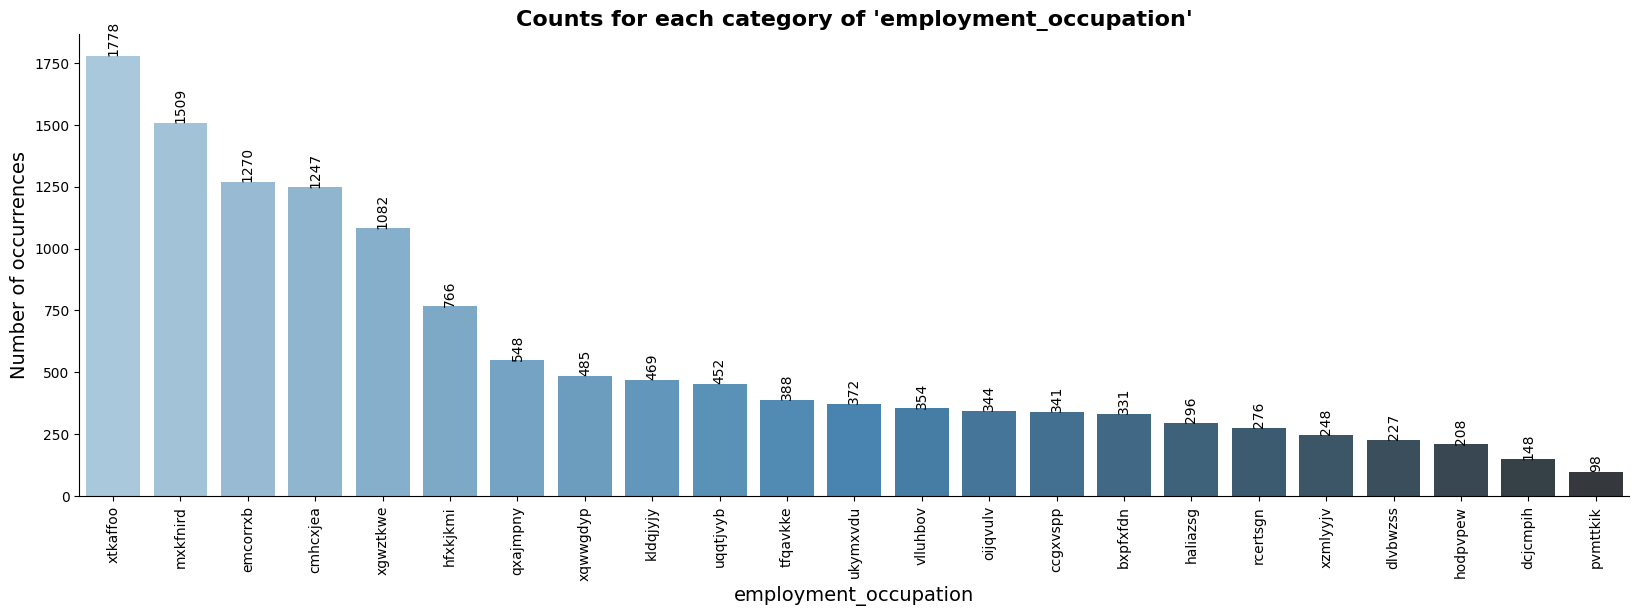

In [ ]:
for col in object_columns:

    # Set the figure size for each plot
    plt.figure(figsize=(20, 6))

    # Get the counts of each category and order them
    counts = df_train[col].value_counts()
    order = counts.index

    # Plot the count plot using Seaborn with a blue color palette
    ax = sns.countplot(x=col, data=df_train, order=order, palette="Blues_d")

    # Set the title and labels for the plot
    ax.set_title(f"Counts for each category of '{col}'", fontsize=16, fontweight='bold')
    ax.set_xlabel(col, fontsize=14)
    ax.set_ylabel("Number of occurrences", fontsize=14)

    # Rotate the x-axis labels if needed to make them readable
    plt.xticks(rotation=90, fontsize=10)

    # Remove the top and right borders for a cleaner look
    sns.despine()

    # Conditionally annotate the bars with the corresponding count values
    for p in ax.patches:
        height = p.get_height()  # Get the height (count) of each bar
        if len(order) > 10:  # If there are more than 10 bars, rotate the annotation
            ax.annotate(f'{int(height)}',
                        (p.get_x() + p.get_width() / 2, height),  # Position of the annotation
                        ha='center', va='bottom', fontsize=10, rotation=90)  # Rotate by 90 degrees
        else:
            ax.annotate(f'{int(height)}',
                        (p.get_x() + p.get_width() / 2, height),  # Position of the annotation
                        ha='center', va='bottom', fontsize=10)  # No rotation

    # Show the plot
    plt.show()

In [ ]:
numeric_columns=numeric_columns.drop(['respondent_id'])

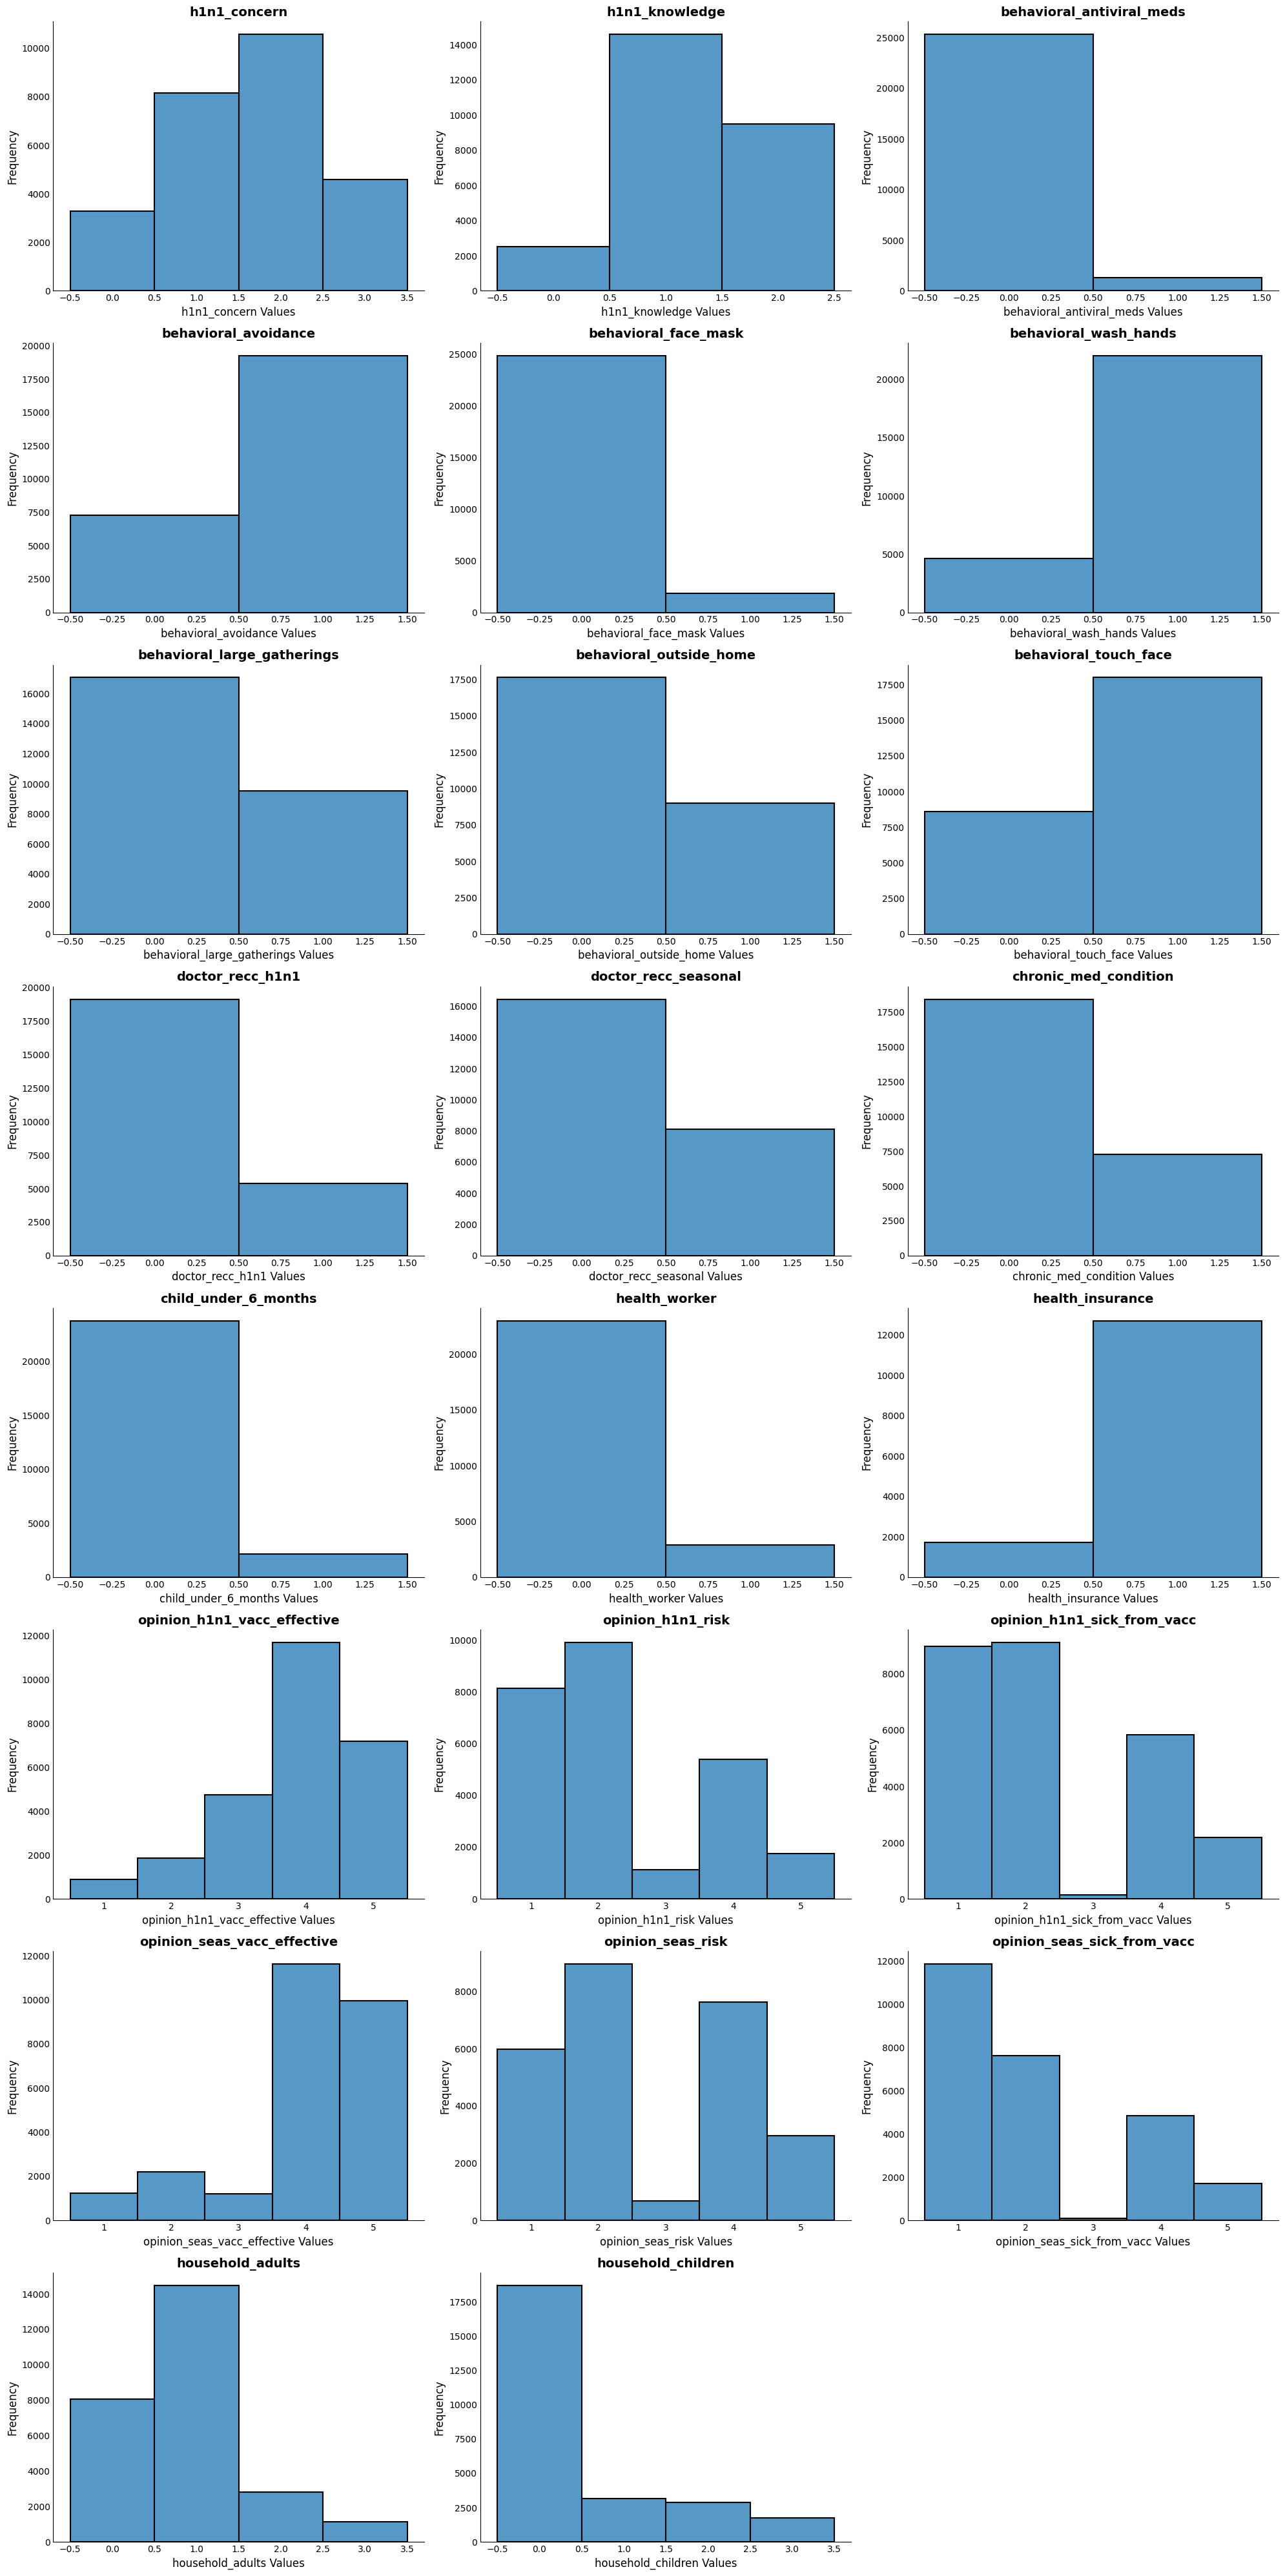

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
# Calculate the number of rows and columns required for the subplot grid
num_vars = len(numeric_columns)  # Total number of numeric variables
num_cols = 3  # You can adjust this number based on your preferences
num_rows = (num_vars + num_cols - 1) // num_cols  # Calculate the number of rows needed to fit all plots

# Create the grid of subplots
fig, axes = plt.subplots(nrows=num_rows, ncols=num_cols, figsize=(20, 5 * num_rows))
axes = axes.flatten()  # Flatten the axes array to make it easier to iterate

# Plot a histogram for each numeric variable with customized bins and styling
for ax, col in zip(axes, numeric_columns):
    # Determine the number of bins: use the number of unique values, except for 'CGPA'
    #if col == 'CGPA':
    #    bins = 30  # Set a fixed number of bins for CGPA
    #else:
    bins = len(df_train[col].unique())  # Set bins equal to the number of unique values

    # Plot the histogram with Seaborn's histplot (no KDE line yet)
    sns.histplot(df_train[col], bins=bins, ax=ax, kde=False, edgecolor="black",
                 linewidth=1.5, discrete=True)

    # Get the current axes and the lines from the KDE plot
    for line in ax.lines:
        # Adjust the KDE line properties: set color and linewidth
        if isinstance(line, plt.Line2D):  # Ensure it is a line (the KDE line is a Line2D object)
            line.set_color('orange')  # Set KDE line color
            line.set_linewidth(2)  # Set KDE line width

    # Set the title and labels for a cleaner look
    ax.set_title(col, fontsize=14, fontweight='bold')
    ax.set_xlabel(f'{col} Values', fontsize=12)
    ax.set_ylabel('Frequency', fontsize=12)

    # Remove grid and ticks for a cleaner look
    ax.grid(False)  # Disable gridlines
    ax.tick_params(axis='both', which='both', length=0)  # Remove ticks

    # Remove the frame (spines) around the plot
    #for spine in ax.spines.values():
    #    spine.set_visible(False)
    spine = list(ax.spines.values())
    spine[3].set_visible(False)
    spine[1].set_visible(False)

# Remove unused subplots if the number of variables is less than the number of subplots
for i in range(len(numeric_columns), len(axes)):
    fig.delaxes(axes[i])

# Adjust the layout to prevent overlapping
plt.tight_layout()

# Show the plot
plt.show()

In [ ]:
#See label output distribution
temp = pd.DataFrame([df_train_out['h1n1_vaccine'].value_counts(),df_train_out['seasonal_vaccine'].value_counts()],index=['h1n1','season']  )
temp['percent']=temp.apply(lambda x: x[1]/x.sum()*100,axis=1)
#temp['percent']=temp['percent']/temp['percent'].sum()
temp

0      1    percent
h1n1    21033   5674  21.245366
season  14272  12435  46.560827

In [ ]:
df_train_hands=pd.concat([df_train,df_train_out],axis=1)

In [ ]:
df_trainh1=pd.concat([df_train_hands[colCOM],df_train_hands[colH1N1],df_train_hands['h1n1_vaccine']],axis=1)
df_trainsea=pd.concat([df_train_hands[colCOM],df_train_hands[colSEA],df_train_hands['seasonal_vaccine']],axis=1)

In [ ]:
df_testh1=pd.concat([df_test[colCOM],df_test[colH1N1]],axis=1)
df_testsea=pd.concat([df_test[colCOM],df_test[colSEA]],axis=1)

In [ ]:
#percentage of class
df_trainh1['h1n1_vaccine'].value_counts()
#df_train_out.info()

h1n1_vaccine
0    21033
1     5674
Name: count, dtype: int64

In [ ]:
#class weight for class 1 h1n1 data
df_trainh1['h1n1_vaccine'].value_counts()[0]/df_trainh1['h1n1_vaccine'].value_counts()[1]

3.706908706379979

In [ ]:
df_trainsea['seasonal_vaccine'].value_counts()

seasonal_vaccine
0    14272
1    12435
Name: count, dtype: int64

In [ ]:
colCOM

Index(['age_group', 'behavioral_antiviral_meds', 'behavioral_avoidance',
       'behavioral_face_mask', 'behavioral_large_gatherings',
       'behavioral_outside_home', 'behavioral_touch_face',
       'behavioral_wash_hands', 'census_msa', 'child_under_6_months',
       'chronic_med_condition', 'education', 'employment_industry',
       'employment_occupation', 'employment_status', 'health_insurance',
       'health_worker', 'hhs_geo_region', 'household_adults',
       'household_children', 'income_poverty', 'marital_status', 'race',
       'rent_or_own', 'sex'],
      dtype='object')

In [ ]:
df_test.columns

Index(['respondent_id', 'h1n1_concern', 'h1n1_knowledge',
       'behavioral_antiviral_meds', 'behavioral_avoidance',
       'behavioral_face_mask', 'behavioral_wash_hands',
       'behavioral_large_gatherings', 'behavioral_outside_home',
       'behavioral_touch_face', 'doctor_recc_h1n1', 'doctor_recc_seasonal',
       'chronic_med_condition', 'child_under_6_months', 'health_worker',
       'health_insurance', 'opinion_h1n1_vacc_effective', 'opinion_h1n1_risk',
       'opinion_h1n1_sick_from_vacc', 'opinion_seas_vacc_effective',
       'opinion_seas_risk', 'opinion_seas_sick_from_vacc', 'age_group',
       'education', 'race', 'sex', 'income_poverty', 'marital_status',
       'rent_or_own', 'employment_status', 'hhs_geo_region', 'census_msa',
       'household_adults', 'household_children', 'employment_industry',
       'employment_occupation'],
      dtype='object')

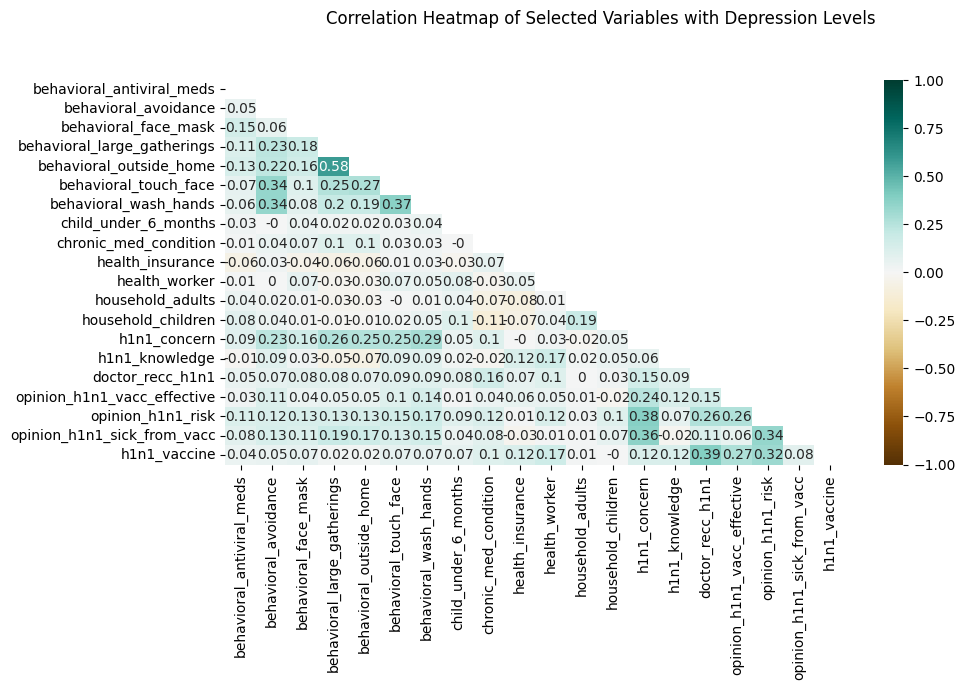

In [ ]:
# Calculate the correlation matrix and round to 2 decimal places
corr_matrix = df_trainh1.corr(numeric_only=True).round(2)

# Sort correlations of "h1n1_vaccine" in descending order
corr_with_depression = corr_matrix["h1n1_vaccine"].sort_values(ascending=False)

# Create the correlation heatmap
plt.figure(figsize=(10, 5))

# Mask the upper triangle of the heatmap (to avoid redundant values)
mask = np.triu(np.ones_like(corr_matrix))

# Create the heatmap with the selected colormap and annotations
sns.heatmap(corr_matrix, cmap='BrBG', mask=mask, vmin=-1, vmax=1, annot=True)

# Add title
plt.suptitle("Correlation Heatmap of Selected Variables with Depression Levels", y=1.02)  # Adjust y for spacing

# Show the plot
plt.show()

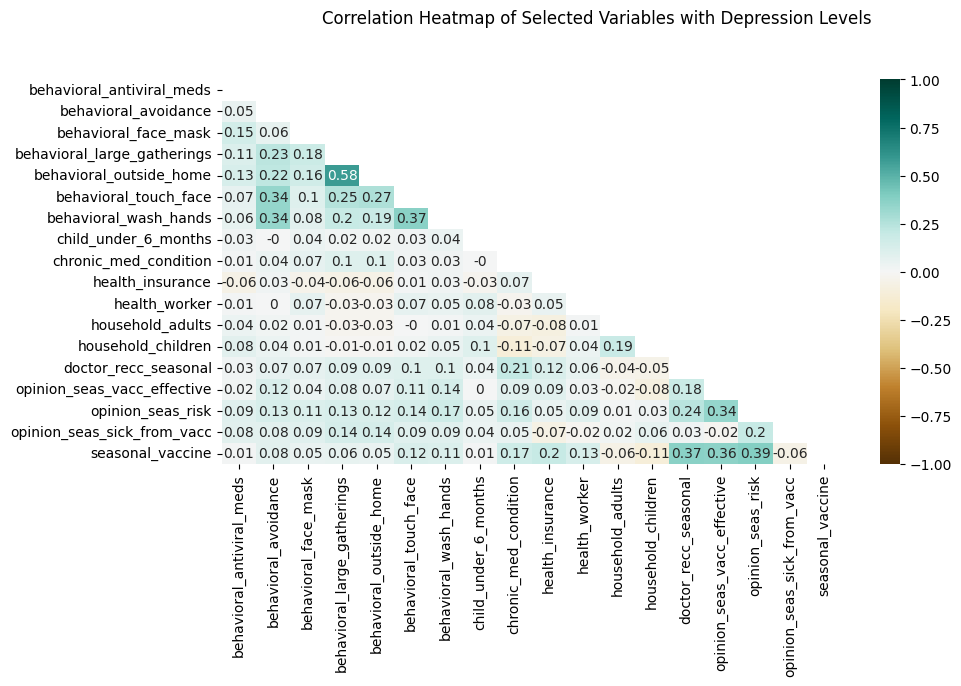

In [ ]:
# Calculate the correlation matrix and round to 2 decimal places
corr_matrix = df_trainsea.corr(numeric_only=True).round(2)

# Sort correlations of "h1n1_vaccine" in descending order
corr_with_depression = corr_matrix["seasonal_vaccine"].sort_values(ascending=False)

# Create the correlation heatmap
plt.figure(figsize=(10, 5))

# Mask the upper triangle of the heatmap (to avoid redundant values)
mask = np.triu(np.ones_like(corr_matrix))

# Create the heatmap with the selected colormap and annotations
sns.heatmap(corr_matrix, cmap='BrBG', mask=mask, vmin=-1, vmax=1, annot=True)

# Add title
plt.suptitle("Correlation Heatmap of Selected Variables with Depression Levels", y=1.02)  # Adjust y for spacing

# Show the plot
plt.show()

In [ ]:
pd.set_option('display.max_columns', None)
df_trainsea[df_trainsea.isna().any(axis=1)][:5]



age_group  behavioral_antiviral_meds  behavioral_avoidance  \
0  55 - 64 Years                        0.0                   0.0   
2  18 - 34 Years                        0.0                   1.0   
3      65+ Years                        0.0                   1.0   
4  45 - 54 Years                        0.0                   1.0   
5      65+ Years                        0.0                   1.0   

   behavioral_face_mask  behavioral_large_gatherings  behavioral_outside_home  \
0                   0.0                          0.0                      1.0   
2                   0.0                          0.0                      0.0   
3                   0.0                          1.0                      0.0   
4                   0.0                          1.0                      0.0   
5                   0.0                          0.0                      0.0   

   behavioral_touch_face  behavioral_wash_hands                census_msa  \
0                    1.0                    0.0                   Non-MSA   
2                    0.0                    0.0  MSA, Not Principle  City   
3                    0.0                    1.0       MSA, Principle City   
4                    1.0                    1.0  MSA, Not Principle  City   
5                    1.0                    1.0       MSA, Principle City   

   child_under_6_months  chronic_med_condition         education  \
0                   0.0                    0.0        < 12 Years   
2                   0.0                    1.0  College Graduate   
3                   0.0                    1.0          12 Years   
4                   0.0                    0.0      Some College   
5                   0.0                    0.0          12 Years   

  employment_industry employment_occupation   employment_status  \
0                 NaN                   NaN  Not in Labor Force   
2            rucpziij              xtkaffoo            Employed   
3                 NaN                   NaN  Not in Labor Force   
4            wxleyezf              emcorrxb            Employed   
5            saaquncn              vlluhbov            Employed   

   health_insurance  health_worker hhs_geo_region  household_adults  \
0               1.0            0.0       oxchjgsf               0.0   
2               NaN            0.0       qufhixun               2.0   
3               NaN            0.0       lrircsnp               0.0   
4               NaN            0.0       qufhixun               1.0   
5               NaN            0.0       atmpeygn               2.0   

   household_children             income_poverty marital_status   race  \
0                 0.0              Below Poverty    Not Married  White   
2                 0.0  <= $75,000, Above Poverty    Not Married  White   
3                 0.0              Below Poverty    Not Married  White   
4                 0.0  <= $75,000, Above Poverty        Married  White   
5                 3.0  <= $75,000, Above Poverty        Married  White   

  rent_or_own     sex  doctor_recc_seasonal  opinion_seas_vacc_effective  \
0         Own  Female                   0.0                          2.0   
2         Own    Male                   NaN                          4.0   
3        Rent  Female                   1.0                          5.0   
4         Own  Female                   0.0                          3.0   
5         Own    Male                   1.0                          5.0   

   opinion_seas_risk  opinion_seas_sick_from_vacc  seasonal_vaccine  
0                1.0                          2.0                 0  
2                1.0                          2.0                 0  
3                4.0                          1.0                 1  
4                1.0                          4.0                 0  
5                4.0                          4.0                 0

In [ ]:
numeric_columns

Index(['respondent_id', 'h1n1_concern', 'h1n1_knowledge',
       'behavioral_antiviral_meds', 'behavioral_avoidance',
       'behavioral_face_mask', 'behavioral_wash_hands',
       'behavioral_large_gatherings', 'behavioral_outside_home',
       'behavioral_touch_face', 'doctor_recc_h1n1', 'doctor_recc_seasonal',
       'chronic_med_condition', 'child_under_6_months', 'health_worker',
       'health_insurance', 'opinion_h1n1_vacc_effective', 'opinion_h1n1_risk',
       'opinion_h1n1_sick_from_vacc', 'opinion_seas_vacc_effective',
       'opinion_seas_risk', 'opinion_seas_sick_from_vacc', 'household_adults',
       'household_children'],
      dtype='object')

In [ ]:
temp=numeric_columns.difference(['respondent_id'])
df_trainh1[df_trainh1.select_dtypes(include=['float']).columns]=df_trainh1[df_trainh1.select_dtypes(include=['float']).columns].round().astype('Int64')
#df_trainsea[numeric_columns.difference('respondent_id')]=df_trainsea[numeric_columns.difference('respondent_id')].round().astype('Int64')
df_trainh1=df_trainh1.fillna(999)
df_trainh1=df_trainh1.astype('category')
#for col in df_trainh1.columns:
#  df_trainh1[col]=df_trainh1[col].cat.add_categories(['unknown']).fillna('unknown',inplace=True)
#tempidx1=df_trainh1['behavioral_antiviral_meds'].copy()
#df_trainh1['behavioral_antiviral_meds'].fillna(0,inplace=True)

In [ ]:
df_trainh1['h1n1_concern'].unique()

[1, 3, 2, 0, 999]
Categories (5, Int64): [0, 1, 2, 3, 999]

In [ ]:
#using catboost
from catboost import CatBoostClassifier, Pool
from catboost import cv
from IPython.display import SVG

cat_features = df_trainh1.columns.to_list()
cat_features.remove('h1n1_vaccine')
#cat_cols = list(df.select_dtypes(include=["object", "category"]).columns)
#df[cat_cols] = df[cat_cols].astype(str)
X = df_trainh1#.astype('category')
#X = X.astype(str)
#X.fillna("__NA__", inplace=True)
X['behavioral_antiviral_meds']=X['behavioral_antiviral_meds'].astype(str)
y = X['h1n1_vaccine']
X = X.drop(['h1n1_vaccine'],axis=1)
#y = df_trainh1['h1n1_vaccine']
params = {}
params['loss_function'] = 'Logloss'
params['iterations'] = 8000
params['custom_loss'] = 'AUC'
params['random_seed'] = 63
params['learning_rate'] = 0.01
params['class_weights'] = [1,3.7]

cat_features=[]
for i in range(31):
  cat_features.append(i)
cv_data = cv(
    params = params,
    pool = Pool(X, label=y, cat_features=cat_features),
    fold_count=3,
    shuffle=False,
    partition_random_seed =3,
    plot=True,
    plot_file='metrics.svg',
    stratified=True,
    early_stopping_rounds=200,
    return_models=True,
    verbose=False
)

display(SVG('./metrics.svg'))


MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

Training on fold [0/3]

bestTest = 0.453903223
bestIteration = 1959

Training on fold [1/3]

bestTest = 0.4513520045
bestIteration = 2763

Training on fold [2/3]

bestTest = 0.4562127038
bestIteration = 2472



In [ ]:
X.iloc[:,1].value_counts()
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26707 entries, 0 to 26706
Data columns (total 31 columns):
 #   Column                       Non-Null Count  Dtype   
---  ------                       --------------  -----   
 0   age_group                    26707 non-null  category
 1   behavioral_antiviral_meds    26707 non-null  category
 2   behavioral_avoidance         26707 non-null  category
 3   behavioral_face_mask         26707 non-null  category
 4   behavioral_large_gatherings  26707 non-null  category
 5   behavioral_outside_home      26707 non-null  category
 6   behavioral_touch_face        26707 non-null  category
 7   behavioral_wash_hands        26707 non-null  category
 8   census_msa                   26707 non-null  category
 9   child_under_6_months         26707 non-null  category
 10  chronic_med_condition        26707 non-null  category
 11  education                    26707 non-null  category
 12  employment_industry          26707 non-null  category
 13  e

In [ ]:
cv_data[1][2].get_feature_importance(prettified=True)

Feature Id  Importances
0              health_insurance    12.959143
1              doctor_recc_h1n1    12.144133
2             opinion_h1n1_risk    10.550392
3   opinion_h1n1_vacc_effective    10.104317
4                hhs_geo_region     3.995313
5   opinion_h1n1_sick_from_vacc     3.976687
6                     age_group     3.485787
7           employment_industry     3.162966
8                 health_worker     2.781556
9                  h1n1_concern     2.652114
10                    education     2.266622
11                         race     2.175006
12               h1n1_knowledge     2.085108
13                   census_msa     2.080878
14                  rent_or_own     2.078376
15               income_poverty     2.038239
16        employment_occupation     1.967838
17         behavioral_face_mask     1.960184
18           household_children     1.897260
19      behavioral_outside_home     1.832340
20                          sex     1.821436
21        behavioral_wash_hands     1.553384
22             household_adults     1.529696
23  behavioral_large_gatherings     1.454808
24               marital_status     1.397305
25         behavioral_avoidance     1.314650
26        behavioral_touch_face     1.119491
27            employment_status     0.959470
28         child_under_6_months     0.940062
29    behavioral_antiviral_meds     0.881874
30        chronic_med_condition     0.833566

In [ ]:
#cv_data[0]['test-Logloss-mean'].min()
best_value = np.min(cv_data[0]['test-Logloss-mean'])
best_iter = np.argmin(cv_data[0]['test-Logloss-mean'])
print('Best validation Logloss score, stratified: {:.4f}±{:.4f} on step {}'.format(
      best_value,
      cv_data[0]['test-Logloss-std'][best_iter],
      best_iter)
  )

Best validation Logloss score, stratified: 0.4539±0.0024 on step 2604


In [ ]:
model_list=cv_data[1]

In [ ]:
for i in range(3):
  print(model_list[i].get_feature_importance(prettified=True)[:7])

                    Feature Id  Importances
0             health_insurance    14.362669
1             doctor_recc_h1n1    12.655633
2            opinion_h1n1_risk    10.892250
3  opinion_h1n1_vacc_effective     9.611683
4               hhs_geo_region     3.819065
5                health_worker     3.641447
6                    age_group     3.615120
                    Feature Id  Importances
0             health_insurance    13.476287
1            opinion_h1n1_risk    11.323060
2             doctor_recc_h1n1     9.769152
3  opinion_h1n1_vacc_effective     9.282528
4               hhs_geo_region     4.690277
5  opinion_h1n1_sick_from_vacc     3.228435
6          employment_industry     3.108644
                    Feature Id  Importances
0             health_insurance    12.959143
1             doctor_recc_h1n1    12.144133
2            opinion_h1n1_risk    10.550392
3  opinion_h1n1_vacc_effective    10.104317
4               hhs_geo_region     3.995313
5  opinion_h1n1_sick_from_vacc  

In [ ]:
shap_values = model_list[0].get_feature_importance(Pool(X, label=y, cat_features=cat_features), type='ShapValues')
expected_value = shap_values[0,-1]
shap_values = shap_values[:,:-1]
print(shap_values.shape)

(26707, 31)


In [ ]:

for i in range(3):
  model_list[i].save_model(f'catboost_h1cvcat_01_{i}') # empty becuase no eval set

In [ ]:
model_list[0].fit(eval_set=eval_data,verbose=False)

array([-2.84565275,  0.1288259 , -4.45600732, ..., -2.59840591,
       -3.40837602, -1.08999394])

In [ ]:
raw_pred=model_list[0].predict(X,prediction_type='RawFormulaVal')

In [ ]:
#h1model = CatBoostClassifier()
#h1model.load_model('/content/catboost_h1cvmodel3.bin')

h1model = model_list[1]

In [ ]:
h1model.is_fitted()

True

In [ ]:
temp=numeric_columns.difference(['respondent_id'])
df_testh1[df_testh1.select_dtypes(include=['float']).columns]=df_testh1[df_testh1.select_dtypes(include=['float']).columns].round().astype('Int64')
#df_trainsea[numeric_columns.difference('respondent_id')]=df_trainsea[numeric_columns.difference('respondent_id')].round().astype('Int64')
df_testh1=df_testh1.fillna(999)
df_testh1=df_testh1.astype('category')


In [ ]:
X=df_testh1

In [ ]:
raw_pred=h1model.predict(X,prediction_type='RawFormulaVal')

In [ ]:
raw_pred=model_list[1].predict(X,prediction_type='RawFormulaVal')

In [ ]:
from numpy import exp

sigmoid = lambda x: 1 / (1 + exp(-x))

probabilities = sigmoid(raw_pred)

print(probabilities)

[0.40457085 0.1053392  0.31073949 ... 0.35463707 0.04817243 0.72335984]


In [ ]:
test_h1n1_vaccine=pd.DataFrame(probabilities,columns=['h1n1_vaccine'])


In [ ]:
test_h1n1_vaccine.to_csv('test_h1n1_vaccine.csv',index=False)

In [ ]:
submission=pd.read_csv('submission2.csv')

In [ ]:
submission.head()

respondent_id  h1n1_vaccine  seasonal_vaccine
0          26707      0.126633          0.199423
1          26708      0.023448          0.026041
2          26709      0.170843          0.642311
3          26710      0.631512          0.918094
4          26711      0.345328          0.487341

In [ ]:
submission['h1n1_vaccine']=test_h1n1_vaccine['h1n1_vaccine']

In [ ]:
submission.head()

respondent_id  h1n1_vaccine  seasonal_vaccine
0          26707      0.404571          0.199423
1          26708      0.105339          0.026041
2          26709      0.310739          0.642311
3          26710      0.813692          0.918094
4          26711      0.712378          0.487341

In [ ]:
submission.to_csv('submission4.csv',index=False)

In [ ]:
for i in range(5):
  model_list[i].save_model(f'catboost_h1cvmodel{i}_v2.bin')

In [ ]:
model_list[4].get_params()

In [ ]:
import shap

shap.initjs()
shap.force_plot(expected_value, shap_values[3,:], X.iloc[3,:])
#from google.colab import output
#output.disable_custom_widget_manager()

In [ ]:
shap.initjs()
shap.force_plot(expected_value, shap_values[2104,:], X.iloc[2104,:])

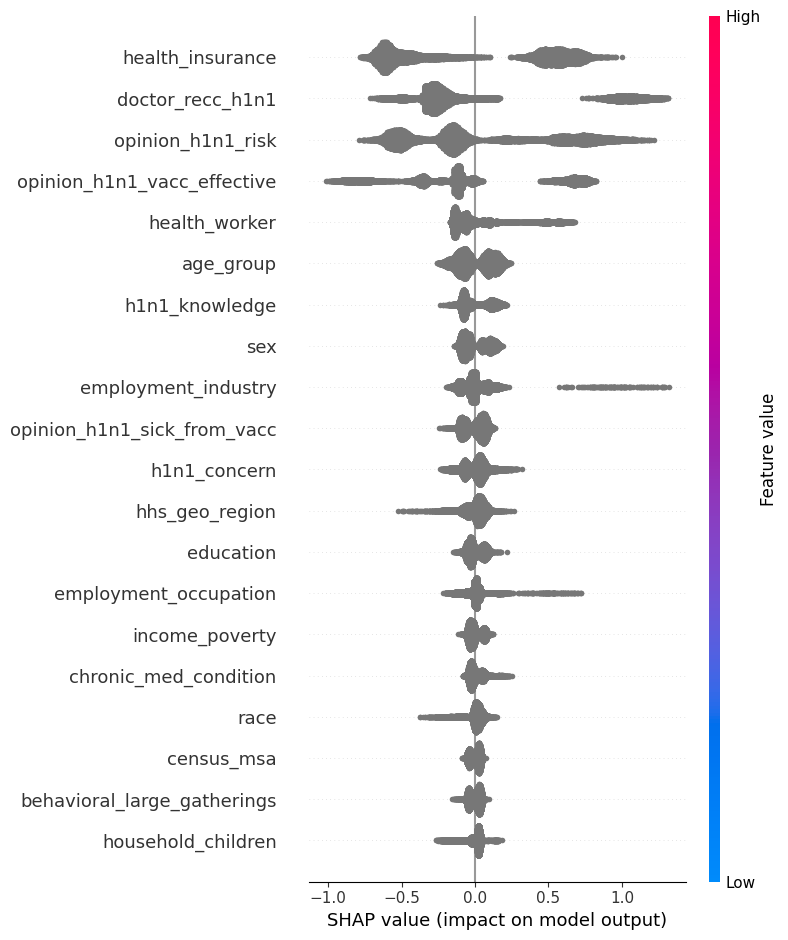

In [ ]:
shap.summary_plot(shap_values, X)

In [ ]:
X_small = X.iloc[0:200]
shap_small = shap_values[:200]
shap.initjs()
shap.force_plot(expected_value, shap_small, X_small)

In [ ]:
df_trainh1.to_csv('trainh1.tsv',sep='\t',index=False)
df_trainsea.to_csv('trainsea.tsv',sep='\t',index=False)

In [ ]:
!cat trainh1.tsv | head -n 5

age_group	behavioral_antiviral_meds	behavioral_avoidance	behavioral_face_mask	behavioral_large_gatherings	behavioral_outside_home	behavioral_touch_face	behavioral_wash_hands	census_msa	child_under_6_months	chronic_med_condition	education	employment_industry	employment_occupation	employment_status	health_insurance	health_worker	hhs_geo_region	household_adults	household_children	income_poverty	marital_status	race	rent_or_own	sex	h1n1_concern	h1n1_knowledge	doctor_recc_h1n1	opinion_h1n1_vacc_effective	opinion_h1n1_risk	opinion_h1n1_sick_from_vacc	h1n1_vaccine
55 - 64 Years	0.0	0.0	0.0	0.0	1.0	1.0	0.0	Non-MSA	0.0	0.0	< 12 Years			Not in Labor Force	1.0	0.0	oxchjgsf	0.0	0.0	Below Poverty	Not Married	White	Own	Female	1.0	0.0	0.0	3.0	1.0	2.0	0
35 - 44 Years	0.0	1.0	0.0	0.0	1.0	1.0	1.0	MSA, Not Principle  City	0.0	0.0	12 Years	pxcmvdjn	xgwztkwe	Employed	1.0	0.0	bhuqouqj	0.0	0.0	Below Poverty	Not Married	White	Rent	Male	3.0	2.0	0.0	5.0	4.0	4.0	0
18 - 34 Years	0.0	1.0	0.0	0.0	0.0	0.0	0.0	MSA, No

In [ ]:
from catboost.utils import create_cd
feature_names = dict()
for column, name in enumerate(df_trainh1):
    if column == 31:
        continue
    feature_names[column] = name

create_cd(
    label=31,
    cat_features=list(range(31)),
    feature_names=feature_names,
    output_path='./trainh1.cd')
feature_names={}
for column, name in enumerate(df_trainsea):
    if column == 29:
        continue
    feature_names[column] = name

create_cd(
    label=29,
    cat_features=list(range(29)),
    feature_names=feature_names,
    output_path='./trainsea.cd')


In [ ]:
!cat ./trainh1.cd

0	Categ	age_group
1	Categ	behavioral_antiviral_meds
2	Categ	behavioral_avoidance
3	Categ	behavioral_face_mask
4	Categ	behavioral_large_gatherings
5	Categ	behavioral_outside_home
6	Categ	behavioral_touch_face
7	Categ	behavioral_wash_hands
8	Categ	census_msa
9	Categ	child_under_6_months
10	Categ	chronic_med_condition
11	Categ	education
12	Categ	employment_industry
13	Categ	employment_occupation
14	Categ	employment_status
15	Categ	health_insurance
16	Categ	health_worker
17	Categ	hhs_geo_region
18	Categ	household_adults
19	Categ	household_children
20	Categ	income_poverty
21	Categ	marital_status
22	Categ	race
23	Categ	rent_or_own
24	Categ	sex
25	Categ	h1n1_concern
26	Categ	h1n1_knowledge
27	Categ	doctor_recc_h1n1
28	Categ	opinion_h1n1_vacc_effective
29	Categ	opinion_h1n1_risk
30	Categ	opinion_h1n1_sick_from_vacc
31	Label	


In [ ]:
from catboost.eval.catboost_evaluation import *
learn_params = {'iterations': 2000,
                'learning_rate': 0.03, # we set big learning_rate,
                                      # because we have small
                                      # #iterations
                'random_seed': 0,
                'verbose': False,
                'loss_function' :'Logloss',
                'custom_metric':'AUC:hints=skip_train~false',
                'boosting_type': 'Plain'}
evaluator = CatboostEvaluation('trainh1.tsv',
                               delimiter='\t',
                               fold_size=8000, # <= 50% of dataset
                               fold_count=20,
                               column_description='trainh1.cd',
                               partition_random_seed=0,
                               has_header=True,
                               #working_dir=...
)
result = evaluator.eval_features(learn_config=learn_params,
                                 eval_metrics=['Logloss', 'AUC:hints=skip_train~false'],
                                 features_to_eval=[12,13,15,16,27,28,29])   #emp_ind,emp_occ,health_insurance,health_worker,doctor_rec,opinion_effective,opinion_risk

KeyboardInterrupt: 

In [ ]:
from catboost.eval.evaluation_result import *
logloss_result = result.get_metric_results('Logloss')
logloss_result.get_baseline_comparison(
    ScoreConfig(ScoreType.Rel, overfit_iterations_info=False)
)

PValue      Score  Quantile 0.005  Quantile 0.995 Decision
Features: 27  0.000089  11.293822       11.071752       11.503355     GOOD
Features: 29  0.000089   7.681167        7.465502        7.897682     GOOD
Features: 15  0.000089   7.276325        7.086276        7.462785     GOOD
Features: 28  0.000089   6.871453        6.687776        7.071190     GOOD
Features: 12  0.000089   2.066924        1.887826        2.260555     GOOD
Features: 13  0.000089   1.680486        1.544022        1.824057     GOOD
Features: 16  0.000089   1.576418        1.379917        1.746053     GOOD

In [ ]:
from catboost.eval.evaluation_result import *
logloss_result = result.get_metric_results('AUC')
logloss_result.get_baseline_comparison(
    ScoreConfig(ScoreType.Rel, overfit_iterations_info=False)
)

PValue      Score  Quantile 0.005  Quantile 0.995 Decision
Features: 16  0.000089   2.928708        2.562624        3.189414     GOOD
Features: 13  0.000089   2.990601        2.686193        3.324543     GOOD
Features: 12  0.000089   3.863073        3.528956        4.200674     GOOD
Features: 28  0.000089  12.285519       11.916714       12.673958     GOOD
Features: 15  0.000089  12.680213       12.324139       13.061752     GOOD
Features: 29  0.000089  12.868304       12.439637       13.216592     GOOD
Features: 27  0.000089  16.127290       15.782472       16.511455     GOOD

In [ ]:
!cat ./trainsea.cd

0	Categ	age_group
1	Categ	behavioral_antiviral_meds
2	Categ	behavioral_avoidance
3	Categ	behavioral_face_mask
4	Categ	behavioral_large_gatherings
5	Categ	behavioral_outside_home
6	Categ	behavioral_touch_face
7	Categ	behavioral_wash_hands
8	Categ	census_msa
9	Categ	child_under_6_months
10	Categ	chronic_med_condition
11	Categ	education
12	Categ	employment_industry
13	Categ	employment_occupation
14	Categ	employment_status
15	Categ	health_insurance
16	Categ	health_worker
17	Categ	hhs_geo_region
18	Categ	household_adults
19	Categ	household_children
20	Categ	income_poverty
21	Categ	marital_status
22	Categ	race
23	Categ	rent_or_own
24	Categ	sex
25	Categ	doctor_recc_seasonal
26	Categ	opinion_seas_vacc_effective
27	Categ	opinion_seas_risk
28	Categ	opinion_seas_sick_from_vacc
29	Label	


In [ ]:
from catboost.eval.catboost_evaluation import *
learn_params = {'iterations': 20, # 2000
                'learning_rate': 0.5, # we set big learning_rate,
                                      # because we have small
                                      # #iterations
                'random_seed': 0,
                'verbose': False,
                'loss_function' : 'Logloss',
                'custom_metric':'AUC:hints=skip_train~false',
                'boosting_type': 'Plain'}
evaluator = CatboostEvaluation('trainsea.tsv',
                               delimiter='\t',
                               fold_size=10000, # <= 50% of dataset
                               fold_count=20,
                               column_description='trainsea.cd',
                               partition_random_seed=0,
                               has_header=True,
                               #working_dir=...
)
result = evaluator.eval_features(learn_config=learn_params,
                                 eval_metrics=['Logloss', 'AUC:hints=skip_train~false'],
                                 features_to_eval=[12,13,15,16,25,26,27])   #emp_ind,emp_occ,health_insurance,health_worker,doctor_rec,opinion_effective,opinion_risk

In [ ]:
from catboost.eval.evaluation_result import *
logloss_result = result.get_metric_results('Logloss')
logloss_result.get_baseline_comparison(
    ScoreConfig(ScoreType.Rel, overfit_iterations_info=False)
)

PValue      Score  Quantile 0.005  Quantile 0.995 Decision
Features: 27  0.000089  12.176675       11.820549       12.468538     GOOD
Features: 26  0.000089   9.653122        9.500964        9.788344     GOOD
Features: 25  0.000089   7.330528        7.152967        7.493311     GOOD
Features: 12  0.000089   1.972480        1.765222        2.192857     GOOD
Features: 13  0.000089   1.610235        1.479606        1.739300     GOOD
Features: 16  0.000089   1.421365        1.299496        1.543348     GOOD
Features: 15  0.000089   0.781945        0.650342        0.935726     GOOD

In [ ]:
from catboost.eval.evaluation_result import *
logloss_result = result.get_metric_results('AUC')
logloss_result.get_baseline_comparison(
    ScoreConfig(ScoreType.Rel, overfit_iterations_info=False)
)

PValue      Score  Quantile 0.005  Quantile 0.995 Decision
Features: 15  0.000089   0.845315        0.689865        1.000224     GOOD
Features: 16  0.000089   1.680148        1.529721        1.821404     GOOD
Features: 13  0.000089   1.849250        1.684360        1.988030     GOOD
Features: 12  0.000089   2.325568        2.097398        2.566533     GOOD
Features: 25  0.000089   7.618252        7.449849        7.805927     GOOD
Features: 26  0.000089   9.867862        9.709059       10.022769     GOOD
Features: 27  0.000089  12.049018       11.770240       12.301018     GOOD

In [ ]:
df_trainsea.select_dtypes(include=['float']).columns

Index(['behavioral_antiviral_meds', 'behavioral_avoidance',
       'behavioral_face_mask', 'behavioral_large_gatherings',
       'behavioral_outside_home', 'behavioral_touch_face',
       'behavioral_wash_hands', 'child_under_6_months',
       'chronic_med_condition', 'health_insurance', 'health_worker',
       'household_adults', 'household_children', 'doctor_recc_seasonal',
       'opinion_seas_vacc_effective', 'opinion_seas_risk',
       'opinion_seas_sick_from_vacc'],
      dtype='object')

In [ ]:
bkdf=df_trainsea.copy()
df_trainsea[df_trainsea.select_dtypes(include=['float']).columns]=df_trainsea[df_trainsea.select_dtypes(include=['float']).columns].round().astype('Int64')
df_trainsea=df_trainsea.fillna(999)
df_trainsea=df_trainsea.astype('category')

In [ ]:
#train for SEA classification
cat_features = df_trainsea.columns.to_list()
cat_features.remove('seasonal_vaccine')
#cat_cols = list(df.select_dtypes(include=["object", "category"]).columns)
#df[cat_cols] = df[cat_cols].astype(str)
X = df_trainsea#.astype('category')
#X = X.astype(str)

params = {
    'learning_rate':[0.01,0.03],
    'iterations':[4000,8000],
    'depth':[8,10],
    'l2_leaf_reg':[3,5],
}

train_data=Pool(data=X.drop(['seasonal_vaccine'],axis=1),label=X['seasonal_vaccine'],cat_features=cat_features)

model=CatBoostClassifier(verbose=300,early_stopping_rounds=200)
sea_predicted_model=model.grid_search(param_grid=params,X=train_data,shuffle=False,cv=2,stratified=True)





0:	learn: 0.6887006	test: 0.6888118	best: 0.6888118 (0)	total: 235ms	remaining: 15m 38s
300:	learn: 0.4537605	test: 0.4685043	best: 0.4685043 (300)	total: 1m 24s	remaining: 17m 12s
600:	learn: 0.4351233	test: 0.4612380	best: 0.4612380 (600)	total: 2m 42s	remaining: 15m 19s
900:	learn: 0.4231261	test: 0.4595714	best: 0.4595574 (891)	total: 4m	remaining: 13m 45s
1200:	learn: 0.4123601	test: 0.4586586	best: 0.4586586 (1200)	total: 5m 21s	remaining: 12m 28s
1500:	learn: 0.4027494	test: 0.4580511	best: 0.4580511 (1500)	total: 6m 43s	remaining: 11m 11s
1800:	learn: 0.3946450	test: 0.4578223	best: 0.4577759 (1769)	total: 8m 4s	remaining: 9m 51s
2100:	learn: 0.3871646	test: 0.4575532	best: 0.4575389 (2095)	total: 9m 27s	remaining: 8m 33s
Stopped by overfitting detector  (200 iterations wait)

bestTest = 0.4575388721
bestIteration = 2095

0:	loss: 0.4575389	best: 0.4575389 (0)	total: 10m 21s	remaining: 2h 35m 25s
0:	learn: 0.6799885	test: 0.6803189	best: 0.6803189 (0)	total: 335ms	remaining: 22

In [ ]:
sea_predicted_model['cv_results']['test-Logloss-mean']


In [ ]:
model.save_model('catboost_seagrid3')

In [ ]:
!unzip seagrid.zip



Archive:  seagrid.zip
  inflating: catboost_seagrid        


In [ ]:
seamodel=CatBoostClassifier()
seamodel.load_model('/content/catboost_seagrid')

In [ ]:
cat_features = df_trainsea.columns.to_list()
cat_features.remove('seasonal_vaccine')

In [ ]:
df_testsea[df_testsea.select_dtypes(include=['float']).columns]=df_testsea[df_testsea.select_dtypes(include=['float']).columns].round().astype('Int64')
df_testsea=df_testsea.fillna(999)
df_testsea=df_testsea.astype('category')

{'verbose': 300, 'early_stopping_rounds': 200, 'depth': 8, 'learning_rate': 0.01, 'l2_leaf_reg': 3, 'iterations': 4000}


In [ ]:
#retrain again with
refitmodel = CatBoostClassifier(
    learning_rate=0.02,
    custom_loss='PRAUC:type=Classic',
    iterations=int(seamodel.tree_count_*1.5),)

X=df_trainsea.astype('category')
X = X.astype(str)
y=X['seasonal_vaccine']
X=X.drop(['seasonal_vaccine'],axis=1)

refitmodel.fit(X,y,cat_features=cat_features,verbose=200)


0:	learn: 0.6849869	total: 320ms	remaining: 15m 58s
200:	learn: 0.4648056	total: 35.7s	remaining: 8m 16s
400:	learn: 0.4540188	total: 1m 9s	remaining: 7m 32s
600:	learn: 0.4476118	total: 1m 43s	remaining: 6m 54s
800:	learn: 0.4436775	total: 2m 16s	remaining: 6m 14s
1000:	learn: 0.4398672	total: 2m 51s	remaining: 5m 41s
1200:	learn: 0.4358458	total: 3m 24s	remaining: 5m 5s
1400:	learn: 0.4319787	total: 3m 59s	remaining: 4m 32s
1600:	learn: 0.4283268	total: 4m 32s	remaining: 3m 58s
1800:	learn: 0.4247442	total: 5m 9s	remaining: 3m 25s
2000:	learn: 0.4214300	total: 5m 42s	remaining: 2m 51s
2200:	learn: 0.4179711	total: 6m 18s	remaining: 2m 17s
2400:	learn: 0.4144294	total: 6m 51s	remaining: 1m 42s
2600:	learn: 0.4111715	total: 7m 26s	remaining: 1m 8s
2800:	learn: 0.4082105	total: 7m 59s	remaining: 34.1s
2999:	learn: 0.4052669	total: 8m 34s	remaining: 0us


In [ ]:
X=df_testsea
raw_pred=model.predict(X,prediction_type='RawFormulaVal')
seaprob = sigmoid(raw_pred)

In [ ]:
test_sea_vaccine=pd.DataFrame(seaprob,columns=['seasonal_vaccine'])

In [ ]:
test_sea_vaccine[test_sea_vaccine['seasonal_vaccine']<0.5].count()

seasonal_vaccine    14639
dtype: int64

In [ ]:
test_sea_vaccine[test_sea_vaccine['seasonal_vaccine']>=0.5].count()

seasonal_vaccine    12069
dtype: int64

In [ ]:
df_train_hands['seasonal_vaccine'].value_counts()

seasonal_vaccine
0    14272
1    12435
Name: count, dtype: int64

In [ ]:
pd.concat([df_test['respondent_id'],test_h1n1_vaccine,test_sea_vaccine],axis=1).to_csv('submission.csv',index=False)